## TINOTENDA DEREK MHLANGA
## U164N0908
## MODULE 2: REAL ESTATE TIME SERIES ANALYSIS, ROI

## STEP 1: DATA INSPECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('zhvi.csv')
NewYork = pd.read_json("NewYork.geojson")

In [3]:
data.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [4]:
data.tail()

RegionID  RegionName                 City State            Metro  \
14718     58333        1338             Ashfield    MA  Greenfield Town   
14719     59107        3293            Woodstock    NH        Claremont   
14720     75672       40404                Berea    KY         Richmond   
14721     93733       81225  Mount Crested Butte    CO              NaN   
14722     95851       89155             Mesquite    NV        Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[5 rows x 272 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
data.describe()

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

In [7]:
data.shape

(14723, 272)

In [8]:
data.isnull().sum().sum()

157934

## Step 2: Data Preprocessing

In [9]:
# Replace missing sale prices for homes with the average sale price for that month
data.fillna(round(data.mean(), 2), inplace=True)

In [10]:
# Rename the RegionName to Zipcode
data.rename(columns={'RegionName':'Zipcode'}, inplace=True)

In [11]:
# Create new dataframes for the States of New York, California and Massachusetts
new_york = data.loc[data['State'] == 'NY']
california = data.loc[data['State'] == 'CA']
ma = data.loc[data['State'] == 'MA']

In [12]:
new_york

RegionID  Zipcode       City State     Metro  CountyName  SizeRank  \
6         61807    10467   New York    NY  New York       Bronx         7   
10        62037    11226   New York    NY  New York       Kings        11   
12        62087    11375   New York    NY  New York      Queens        13   
13        62045    11235   New York    NY  New York       Kings        14   
20        61625    10011   New York    NY  New York    New York        21   
...         ...      ...        ...   ...       ...         ...       ...   
14663     62430    12153  Sand Lake    NY    Albany  Rensselaer     14664   
14693     62433    12156   Schodack    NY    Albany  Rensselaer     14694   
14702     62599    12480  Shandaken    NY  Kingston      Ulster     14703   
14715     62556    12429     Esopus    NY  Kingston      Ulster     14716   
14717     62697    12720     Bethel    NY       NaN    Sullivan     14718   

         1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
6      152900.00  152700.00  152600.00  ...    394400    400000    407300   
10     162000.00  162300.00  162600.00  ...    860200    851000    853900   
12     252400.00  251800.00  251400.00  ...   1022600   1033700   1048600   
13     190500.00  191000.00  191500.00  ...    767300    777300    788800   
20     118299.12  118419.04  118537.42  ...  12137600  12112600  12036600   
...          ...        ...        ...  ...       ...       ...       ...   
14663   95700.00   95000.00   94300.00  ...    191000    191700    192000   
14693   94400.00   94600.00   94800.00  ...    188600    189800    189600   
14702   70900.00   70400.00   70000.00  ...    160100    160600    160500   
14715   78300.00   78300.00   78200.00  ...    164200    166600    170000   
14717   62500.00   62600.00   62700.00  ...    122200    122700    122300   

        2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
6        411600    413200    414300    413900    411400    413200    417900  
10       870000    885100    887800    890500    901700    930700    963200  
12      1066400   1081200   1088800   1092700   1089500   1084000   1084600  
13       793900    796000    799700    806600    810600    813400    816200  
20     12050100  12016300  11946500  11978100  11849300  11563000  11478300  
...         ...       ...       ...       ...       ...       ...       ...  
14663    193100    195400    198300    200500    202600    205200    207300  
14693    190500    191100    192000    193600    196100    198000    199400  
14702    160100    159900    159000    157000    157700    161000    163700  
14715    171000    170700    171300    172400    173600    175800    177500  
14717    122000    122200    122800    123200    123200    120700    117700  

[1015 rows x 272 columns]

In [13]:
california

RegionID  Zipcode               City State  \
9         97564    94109      San Francisco    CA   
15        96107    90250          Hawthorne    CA   
27        97771    94565          Pittsburg    CA   
30        96027    90046        Los Angeles    CA   
64        97711    94501            Alameda    CA   
...         ...      ...                ...   ...   
14683     97304    93517         Bridgeport    CA   
14690     98404    95728            Truckee    CA   
14692     98245    95497          Annapolis    CA   
14709     96805    92322          Crestline    CA   
14712     96822    92341  Green Valley Lake    CA   

                                Metro      CountyName  SizeRank   1996-04  \
9                       San Francisco   San Francisco        10  766000.0   
15     Los Angeles-Long Beach-Anaheim     Los Angeles        16  152500.0   
27                      San Francisco    Contra Costa        28  139200.0   
30     Los Angeles-Long Beach-Anaheim     Los Angeles        31  340600.0   
64                      San Francisco         Alameda        65  222400.0   
...                               ...             ...       ...       ...   
14683                             NaN            Mono     14684  120900.0   
14690                         Truckee          Nevada     14691  147700.0   
14692                      Santa Rosa          Sonoma     14693  307200.0   
14709                       Riverside  San Bernardino     14710   78700.0   
14712                       Riverside  San Bernardino     14713   84200.0   

        1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
9      771100.0  776500.0  ...  3767700  3763900  3775000  3799700  3793900   
15     152600.0  152600.0  ...   579300   585700   590900   594700   598500   
27     138300.0  137500.0  ...   394900   398400   401600   405400   408600   
30     341700.0  343000.0  ...  1839800  1861100  1888600  1903900  1907500   
64     222300.0  222400.0  ...   965100   975000   987800  1000000  1009900   
...         ...       ...  ...      ...      ...      ...      ...      ...   
14683  121400.0  121800.0  ...   287700   276300   263900   259000   259800   
14690  147800.0  148100.0  ...   476900   488600   494100   491200   485700   
14692  306300.0  305500.0  ...   772800   778200   786100   792700   799100   
14709   78500.0   78300.0  ...   180900   182600   184200   185700   187300   
14712   84200.0   84300.0  ...   179700   178300   175700   175600   177000   

       2017-12  2018-01  2018-02  2018-03  2018-04  
9      3778700  3770800  3763100  3779800  3813500  
15      601300   602800   606100   612400   616200  
27      410900   413700   417900   424300   430100  
30     1922100  1952400  1974500  1975900  1966900  
64     1021000  1032400  1042000  1053000  1059700  
...        ...      ...      ...      ...      ...  
14683   262600   264400   265900   269400   272500  
14690   482600   480900   483600   490500   496300  
14692   806900   814600   824300   837100   848700  
14709   189100   189900   191600   195700   200100  
14712   178400   179300   180000   181500   183600  

[1224 rows x 272 columns]

In [14]:
ma

RegionID  Zipcode         City State            Metro CountyName  \
88        58669     2169       Quincy    MA           Boston    Norfolk   
149       58660     2148       Malden    MA           Boston  Middlesex   
250       58666     2155      Medford    MA           Boston  Middlesex   
256       58743     2360     Plymouth    MA           Boston   Plymouth   
345       58710     2301     Brockton    MA           Boston   Plymouth   
...         ...      ...          ...   ...              ...        ...   
14594     58212     1026   Cummington    MA      Springfield  Hampshire   
14625     58351     1368    Royalston    MA        Worcester  Worcester   
14686     58316     1255  Sandisfield    MA       Pittsfield  Berkshire   
14701     58327     1270      Windsor    MA       Pittsfield  Berkshire   
14718     58333     1338     Ashfield    MA  Greenfield Town   Franklin   

       SizeRank    1996-04    1996-05    1996-06  ...  2017-07  2017-08  \
88           89  137800.00  137900.00  137900.00  ...   416900   417800   
149         150  130600.00  130700.00  130800.00  ...   439100   442400   
250         251  157100.00  157300.00  157500.00  ...   564500   570100   
256         257  125900.00  126200.00  126500.00  ...   340100   341700   
345         346  118299.12  118419.04  118537.42  ...   277700   279500   
...         ...        ...        ...        ...  ...      ...      ...   
14594     14595   91200.00   91100.00   91000.00  ...   193400   195900   
14625     14626   88000.00   88000.00   88000.00  ...   186700   190600   
14686     14687  124700.00  125100.00  125500.00  ...   246100   246200   
14701     14702  108600.00  107400.00  106200.00  ...   179000   177800   
14718     14719   94600.00   94300.00   94000.00  ...   216800   217700   

       2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
88      421100   425100   428600   431900   435700   440500   445800   449100  
149     446700   451400   454700   457700   461900   466000   469300   471100  
250     576400   582800   588600   594700   602100   609000   613300   614800  
256     344900   347200   349000   351300   354400   356800   358300   358400  
345     283300   287200   290200   293000   295900   298900   301700   302600  
...        ...      ...      ...      ...      ...      ...      ...      ...  
14594   200800   202600   201800   201200   204600   211200   217900   220800  
14625   193400   195000   196700   198800   200600   202400   204600   206300  
14686   245700   245000   243800   242100   242300   245300   248500   250100  
14701   174400   172200   173100   175200   175700   179800   188800   196000  
14718   218600   218500   218100   216400   213100   209800   209200   209300  

[417 rows x 272 columns]

In [15]:
# Check for the total number of unique Zipcodes in the state of New York
print(f'There are {new_york.Zipcode.nunique()} unique Zipcodes in the state of New York.')

There are 1015 unique Zipcodes in the state of New York.


In [16]:
# Check for the total number of unique Zipcodes in the state of California
print(f'There are {california.Zipcode.nunique()} unique Zipcodes in the state of California.')

There are 1224 unique Zipcodes in the state of California.


In [17]:
# Check for the total number of unique Zipcodes in the state of Massachusetts
print(f'There are {ma.Zipcode.nunique()} unique Zipcodes in the state of Massachusetts.')

There are 417 unique Zipcodes in the state of Massachusetts.


In [18]:
# Convert original dataframes into time series dataframes in order for the work to begin
def melt_data(df):
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [19]:
# apply the function to our dataframes
california_ts = melt_data(california)
new_york_ts = melt_data(new_york)
ma_ts = melt_data(ma)

In [20]:
#Inspect the data 
california_ts

value
time                     
1996-04-01  197811.493725
1996-05-01  197721.720131
1996-06-01  197638.927386
1996-07-01  197574.028203
1996-08-01  197571.151144
...                   ...
2017-12-01  723263.480392
2018-01-01  729496.405229
2018-02-01  735525.980392
2018-03-01  742146.323529
2018-04-01  746329.084967

[265 rows x 1 columns]

In [21]:
new_york_ts

value
time                     
1996-04-01  129583.816355
1996-05-01  129512.680985
1996-06-01  129443.963153
1996-07-01  129367.873990
1996-08-01  129302.864532
...                   ...
2017-12-01  377217.339901
2018-01-01  378981.773399
2018-02-01  380702.463054
2018-03-01  382523.152709
2018-04-01  384160.689655

[265 rows x 1 columns]

In [22]:
ma_ts

value
time                     
1996-04-01  159386.804221
1996-05-01  159732.271271
1996-06-01  160083.722446
1996-07-01  160440.189952
1996-08-01  160798.658873
...                   ...
2017-12-01  448427.338129
2018-01-01  450776.978417
2018-02-01  453590.647482
2018-03-01  456723.741007
2018-04-01  458622.541966

[265 rows x 1 columns]

## Step 3: Visualization 

## Phase 1: Basic WorkFlows, (Risk and Return)

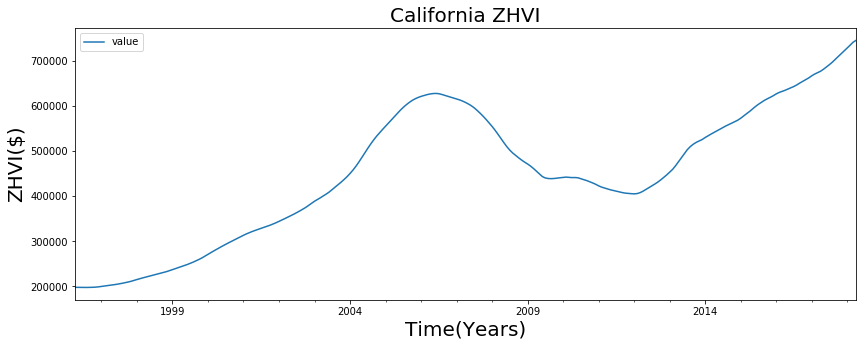

In [23]:
california_ts.plot(figsize = (14,5))
plt.title('California ZHVI', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('ZHVI($)', size = 20)
plt.show()

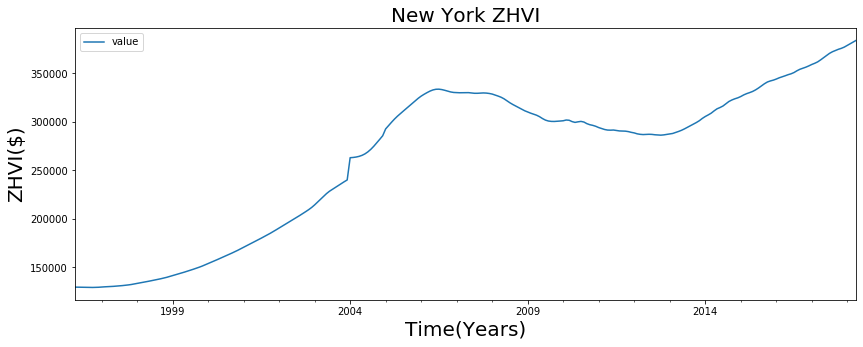

In [24]:
new_york_ts.plot(figsize = (14,5))
plt.title('New York ZHVI', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('ZHVI($)', size = 20)
plt.show()

In [25]:
white_noise_california = np.random.normal(loc = california_ts.value.mean(), scale = california_ts.value.std(),
                          size = len(california_ts))
california_ts['wn'] = white_noise_california
california_ts.describe()

value             wn
count     265.000000     265.000000
mean   452693.835440  455044.657570
std    149280.009923  139647.817672
min    197571.151144   52105.603876
25%    335839.396209  369739.387579
50%    442618.656209  449818.147085
75%    583394.035948  544536.977702
max    746329.084967  780785.968714

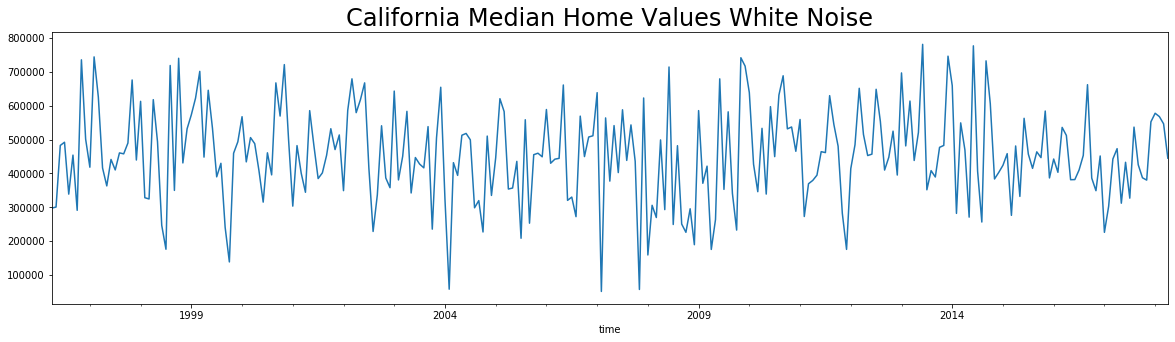

In [26]:
california_ts.wn.plot(figsize = (20,5))
plt.title('California Median Home Values White Noise', size = 24)
plt.show()

In [27]:
white_noise_ny = np.random.normal(loc = new_york_ts.value.mean(), scale = new_york_ts.value.std(),
                          size = len(new_york_ts))
new_york_ts['wn'] = white_noise_ny
new_york_ts.describe()

value             wn
count     265.000000     265.000000
mean   263426.162166  252085.587198
std     78275.404658   78834.851087
min    129248.192709   63089.242148
25%    185109.853005  196657.667938
50%    292808.245478  250426.319942
75%    326207.487685  306549.498760
max    384160.689655  477383.800020

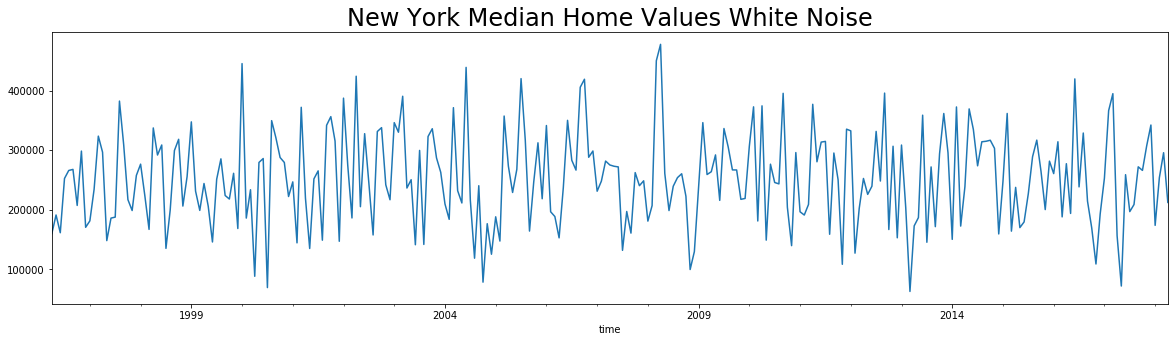

In [28]:
new_york_ts.wn.plot(figsize = (20,5))
plt.title('New York Median Home Values White Noise', size = 24)
plt.show()

In [29]:
white_noise_ma = np.random.normal(loc = ma_ts.value.mean(), scale = ma_ts.value.std(),
                          size = len(ma_ts))
ma_ts['wn'] = white_noise_ma
ma_ts.describe()

value             wn
count     265.000000     265.000000
mean   321978.569361  323667.488427
std     78917.103265   81425.010711
min    159386.804221  108707.827140
25%    279185.036163  276041.458443
50%    337407.474245  322254.022825
75%    380210.178993  377341.661027
max    458622.541966  544164.297880

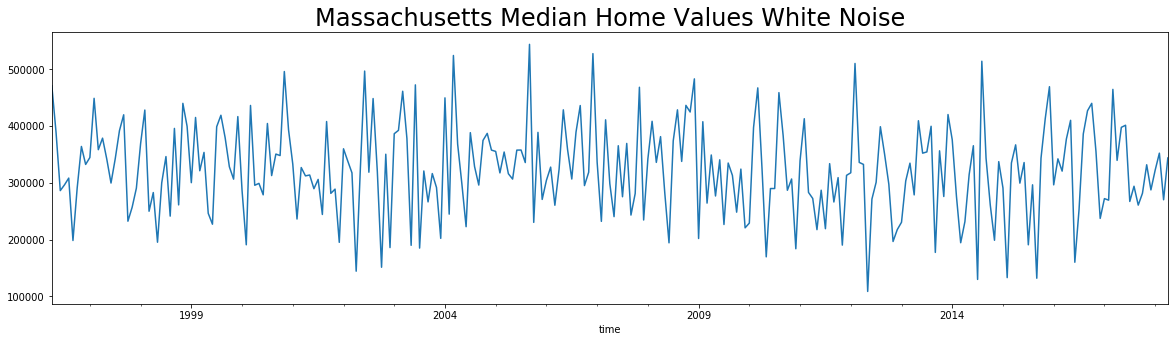

In [30]:
ma_ts.wn.plot(figsize = (20,5))
plt.title('Massachusetts Median Home Values White Noise', size = 24)
plt.show()

In [31]:
sts.adfuller(california_ts.value)

(-1.7579214117763327,
 0.4015434360365922,
 9,
 255,
 {'1%': -3.4562572510874396,
  '5%': -2.8729420379793598,
  '10%': -2.5728461399461744},
 3732.050166175166)

In [32]:
sts.adfuller(new_york_ts.value)

(-1.8309243606622665,
 0.3652202482990876,
 12,
 252,
 {'1%': -3.4565688966099373,
  '5%': -2.8730786194395455,
  '10%': -2.5729189953388762},
 4359.777229614336)

In [33]:
sts.adfuller(ma_ts.value)

(-1.8956242632161509,
 0.3341223872112434,
 4,
 260,
 {'1%': -3.4557539868570775,
  '5%': -2.8727214497041422,
  '10%': -2.572728476331361},
 3743.6233090146193)

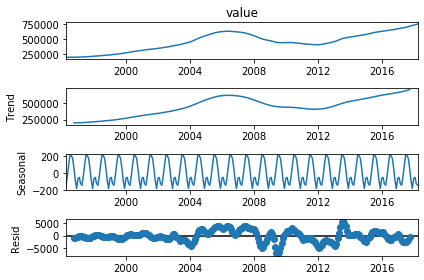

In [34]:
s_dec_california = seasonal_decompose(california_ts.value, model='additive')
s_dec_california.plot()
plt.show()

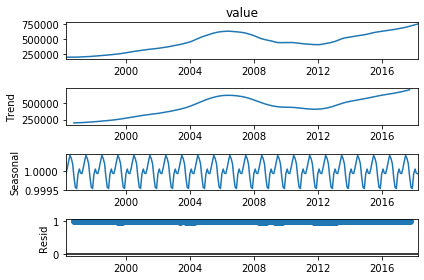

In [35]:
s_dec_california_mul = seasonal_decompose(california_ts.value, model='multiplicative')
s_dec_california_mul.plot()
plt.show()

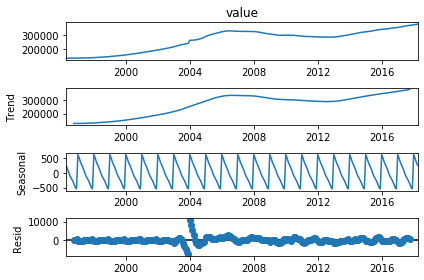

In [36]:
s_dec_ny = seasonal_decompose(new_york_ts.value, model='additive')
s_dec_ny.plot()
plt.show()

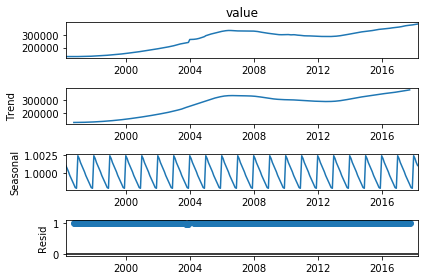

In [37]:
s_dec_ny_mul = seasonal_decompose(new_york_ts.value, model='multiplicative')
s_dec_ny_mul.plot()
plt.show()

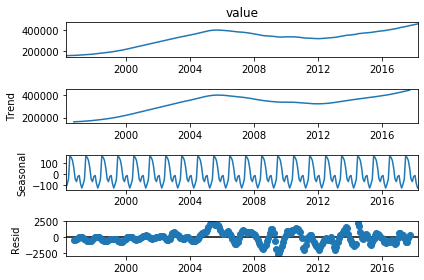

In [38]:
s_dec_ma = seasonal_decompose(ma_ts.value, model='additive')
s_dec_ma.plot()
plt.show()

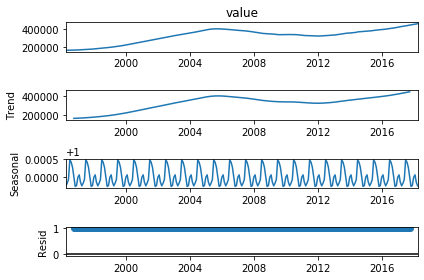

In [39]:
s_dec_ma = seasonal_decompose(ma_ts.value, model='multiplicative')
s_dec_ma.plot()
plt.show()

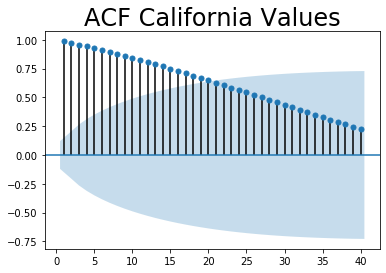

In [40]:
sgt.plot_acf(california_ts.value, lags = 40, zero = False)
plt.title('ACF California Values', size = 24)
plt.show()

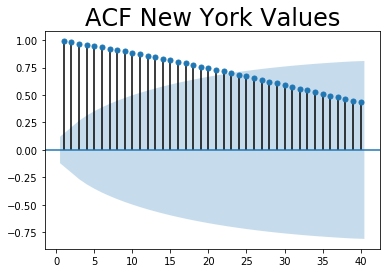

In [41]:
sgt.plot_acf(new_york_ts.value, lags = 40, zero = False)
plt.title('ACF New York Values', size = 24)
plt.show()

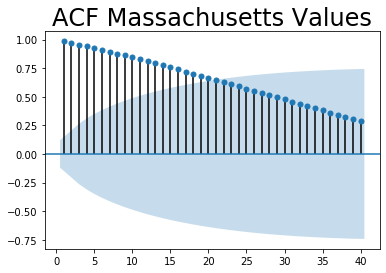

In [42]:
sgt.plot_acf(ma_ts.value, lags = 40, zero = False)
plt.title('ACF Massachusetts Values', size = 24)
plt.show()

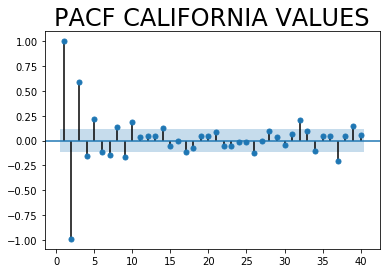

In [43]:
sgt.plot_pacf(california_ts.value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF CALIFORNIA VALUES', size = 24)
plt.show()

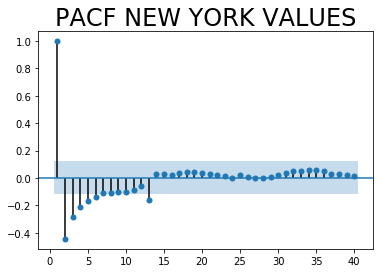

In [44]:
sgt.plot_pacf(new_york_ts.value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF NEW YORK VALUES', size = 24)
plt.show()

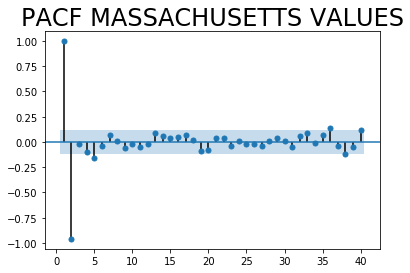

In [45]:
sgt.plot_pacf(ma_ts.value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF MASSACHUSETTS VALUES', size = 24)
plt.show()

In [46]:
california_ar = ARMA(california_ts.value, order = (2,0))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [47]:
california_ar

In [48]:
california_ar_results = california_ar.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [49]:
california_ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(2, 0)   Log Likelihood               -2055.998
Method:                       css-mle   S.D. of innovations            549.134
Date:                Fri, 05 Jun 2020   AIC                           4119.996
Time:                        21:01:15   BIC                           4134.315
Sample:                    04-01-1996   HQIC                          4125.749
                         - 04-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.527e+05   4.77e+04      9.485      0.000    3.59e+05    5.46e+05
ar.L1.value     1.9944      0.004    479.797      0.000       1.986       2.003
ar.L2.value    -0.9951      0.004   -236.665      0.000      -1.003      -0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           -0.0264j            1.0024           -0.0042
AR.2            1.0021           +0.0264j            1.0024            0.0042
-----------------------------------------------------------------------------
"""

In [50]:
new_york_ar = ARMA(new_york_ts.value, order = (2,0))
new_york_ar_results = new_york_ar.fit()
new_york_ar_results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(2, 0)   Log Likelihood               -2356.595
Method:                       css-mle   S.D. of innovations           1732.041
Date:                Fri, 05 Jun 2020   AIC                           4721.190
Time:                        21:01:15   BIC                           4735.509
Sample:                    04-01-1996   HQIC                          4726.943
                         - 04-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.634e+05    1.2e+05      2.202      0.028    2.89e+04    4.98e+05
ar.L1.value     1.5625      0.006    273.258      0.000       1.551       1.574
ar.L2.value    -0.5627      0.006    -98.361      0.000      -0.574      -0.552
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2            1.7762           +0.0000j            1.7762            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
ma_ar = ARMA(ma_ts.value, order = (2,0))
ma_ar_results = ma_ar.fit()
ma_ar_results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(2, 0)   Log Likelihood               -2000.134
Method:                       css-mle   S.D. of innovations            447.295
Date:                Fri, 05 Jun 2020   AIC                           4008.268
Time:                        21:01:15   BIC                           4022.587
Sample:                    04-01-1996   HQIC                          4014.022
                         - 04-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.22e+05   4.56e+04      7.066      0.000    2.33e+05    4.11e+05
ar.L1.value     1.9739      0.012    165.096      0.000       1.950       1.997
ar.L2.value    -0.9744      0.012    -80.580      0.000      -0.998      -0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0128           -0.0192j            1.0130           -0.0030
AR.2            1.0128           +0.0192j            1.0130            0.0030
-----------------------------------------------------------------------------
"""

In [52]:
# ARIMA
model_arima_calif = ARIMA(california_ts.value, order=(3,1,1))
results_arima_calif = model_arima_calif.fit()
results_arima_calif.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1985.842
Method:                       css-mle   S.D. of innovations            443.186
Date:                Fri, 05 Jun 2020   AIC                           3983.684
Time:                        21:01:15   BIC                           4005.140
Sample:                    05-01-1996   HQIC                          3992.306
                         - 04-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1781.0460   1579.558      1.128      0.260   -1314.830    4876.922
ar.L1.D.value     1.2665      0.146      8.647      0.000       0.979       1.554
ar.L2.D.value    -0.2116      0.241     -0.878      0.380      -0.684       0.261
ar.L3.D.value    -0.0779      0.110     -0.710      0.477      -0.293       0.137
ma.L1.D.value     0.4602      0.128      3.598      0.000       0.209       0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0389           +0.0000j            1.0389            0.0000
AR.2            2.1076           +0.0000j            2.1076            0.0000
AR.3           -5.8628           +0.0000j            5.8628            0.5000
MA.1           -2.1731           +0.0000j            2.1731            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
model_arima_ny = ARIMA(new_york_ts.value, order=(3,1,1))
results_arima_ny = model_arima_ny.fit()
results_arima_ny.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2304.422
Method:                       css-mle   S.D. of innovations           1492.370
Date:                Fri, 05 Jun 2020   AIC                           4620.845
Time:                        21:01:16   BIC                           4642.301
Sample:                    05-01-1996   HQIC                          4629.467
                         - 04-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           935.4061    608.737      1.537      0.124    -257.697    2128.509
ar.L1.D.value     0.9616      0.077     12.465      0.000       0.810       1.113
ar.L2.D.value    -0.0160      0.085     -0.187      0.852      -0.184       0.152
ar.L3.D.value     0.0290      0.068      0.425      0.670      -0.105       0.163
ma.L1.D.value    -0.8105      0.048    -17.003      0.000      -0.904      -0.717
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0249           -0.0000j            1.0249           -0.0000
AR.2           -0.2370           -5.7928j            5.7976           -0.2565
AR.3           -0.2370           +5.7928j            5.7976            0.2565
MA.1            1.2338           +0.0000j            1.2338            0.0000
-----------------------------------------------------------------------------
"""

In [54]:
model_arima_ma = ARIMA(ma_ts.value, order=(3,1,1))
results_arima_ma = model_arima_ma.fit()
results_arima_ma.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1983.198
Method:                       css-mle   S.D. of innovations            440.660
Date:                Fri, 05 Jun 2020   AIC                           3978.396
Time:                        21:01:16   BIC                           3999.852
Sample:                    05-01-1996   HQIC                          3987.018
                         - 04-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1152.7265    765.641      1.506      0.132    -347.903    2653.356
ar.L1.D.value     1.4659      0.218      6.724      0.000       1.039       1.893
ar.L2.D.value    -0.5954      0.207     -2.881      0.004      -1.000      -0.190
ar.L3.D.value     0.1152      0.066      1.746      0.081      -0.014       0.245
ma.L1.D.value    -0.5352      0.214     -2.506      0.012      -0.954      -0.117
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0233           -0.0000j            1.0233           -0.0000
AR.2            2.0724           -2.0462j            2.9124           -0.1240
AR.3            2.0724           +2.0462j            2.9124            0.1240
MA.1            1.8686           +0.0000j            1.8686            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
from pmdarima.arima import auto_arima

In [56]:
model_auto_calif = auto_arima(california_ts.value[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=5100.635, BIC=5114.924, Time=0.153 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=5106.424, BIC=5113.568, Time=0.009 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=5099.436, BIC=5113.725, Time=0.583 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=5082.978, BIC=5097.267, Time=0.079 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=5169.118, BIC=5172.690, Time=0.007 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=5088.333, BIC=5099.049, Time=0.032 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=5084.968, BIC=5102.829, Time=0.177 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=5084.138, BIC=5101.999, Time=0.326 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=5083.111, BIC=5097.399, Time=0.100 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA(0,1,1)x(1,0,2,12) [intercept=True]; AIC=5086.063, BIC=5107.496, Time=0.684 seconds
Fit ARIMA(0,1,0)x(0,0,1,12) [intercept=True]; AIC=5098.679, BIC=5109.396, Time=0.061 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Fit ARIMA(1,1,1)x(0,0,1,12) [intercept=True]; AIC=5034.401, BIC=5052.261, Time=1.049 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; AIC=5010.326, BIC=5024.614, Time=0.255 seconds
Fit ARIMA(1,1,1)x(1,0,0,12) [intercept=True]; AIC=5035.378, BIC=5053.239, Time=0.644 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA(1,1,1)x(1,0,1,12) [intercept=True]; AIC=7730.089, BIC=7751.521, Time=1.080 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=5105.776, BIC=5116.492, Time=0.139 seconds
Fit ARIMA(2,1,1)x(0,0,0,12) [intercept=True]; AIC=5027.838, BIC=5045.698, Time=0.232 seconds
Fit ARIMA(1,1,2)x(0,0,0,12) [intercept=True]; AIC=5033.609, BIC=5051.470, Time=0.272 seconds
Fit ARIMA(0,1,2)x(0,0,0,12) [intercept=True]; AIC=5076.707, BIC=5090.996, Time=0.035 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA(2,1,0)x(0,0,0,12) [intercept=True]; AIC=5084.326, BIC=5098.615, Time=0.335 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=5107.806, BIC=5129.239, Time=0.859 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 7.137 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [57]:
model_auto_calif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2501.163
Date:                Fri, 05 Jun 2020   AIC                           5010.326
Time:                        21:01:24   BIC                           5024.614
Sample:                             0   HQIC                          5016.068
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    128.0545     42.064      3.044      0.002      45.611     210.498
ar.L1          0.9162      0.019     48.617      0.000       0.879       0.953
ma.L1         -0.8655      0.022    -39.100      0.000      -0.909      -0.822
sigma2      1.023e+07      0.001   1.26e+10      0.000    1.02e+07    1.02e+07
===================================================================================
Ljung-Box (Q):                     1828.95   Jarque-Bera (JB):                53.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.91
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.64e+25. Standard errors may be unstable.
"""

In [58]:
model_auto_new_york = auto_arima(new_york_ts.value[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)
model_auto_new_york.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=4712.861, BIC=4727.149, Time=0.194 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4711.692, BIC=4718.836, Time=0.017 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=4725.651, BIC=4739.940, Time=0.096 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=4710.671, BIC=4724.960, Time=0.103 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4772.455, BIC=4776.027, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=4711.405, BIC=4722.122, Time=0.027 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=4712.567, BIC=4730.428, Time=0.282 seconds
Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=4712.129, BIC=4729.990, Time=0.640 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=4710.574, BIC=4724.862, Time=0.107 seconds
Fit ARIMA(0,1,1)x(2,0,0,12) [intercept=True]; AIC=4712.146, BIC=4730.007, Time=0.294 seconds
Fit ARIMA(0,1,1)x(2,0,1,12

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; AIC=4695.333, BIC=4709.621, Time=0.215 seconds
Fit ARIMA(1,1,1)x(0,0,1,12) [intercept=True]; AIC=4705.288, BIC=4723.149, Time=0.419 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA(1,1,1)x(1,0,1,12) [intercept=True]; AIC=4703.174, BIC=4724.607, Time=1.491 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=4730.386, BIC=4741.102, Time=0.027 seconds
Fit ARIMA(2,1,1)x(0,0,0,12) [intercept=True]; AIC=4706.186, BIC=4724.047, Time=0.809 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit ARIMA(1,1,2)x(0,0,0,12) [intercept=True]; AIC=4698.325, BIC=4716.186, Time=0.363 seconds
Fit ARIMA(0,1,2)x(0,0,0,12) [intercept=True]; AIC=4711.561, BIC=4725.850, Time=0.049 seconds
Fit ARIMA(2,1,0)x(0,0,0,12) [intercept=True]; AIC=4744.910, BIC=4759.198, Time=0.076 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=4700.955, BIC=4722.388, Time=0.517 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 6.831 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2343.666
Date:                Fri, 05 Jun 2020   AIC                           4695.333
Time:                        21:01:30   BIC                           4709.621
Sample:                             0   HQIC                          4701.075
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     48.9812     46.454      1.054      0.292     -42.068     140.030
ar.L1          0.9385      0.048     19.447      0.000       0.844       1.033
ma.L1         -0.9169      0.053    -17.396      0.000      -1.020      -0.814
sigma2      3.116e+06   6.29e+04     49.501      0.000    2.99e+06    3.24e+06
===================================================================================
Ljung-Box (Q):                      511.63   Jarque-Bera (JB):             73776.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             6.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        83.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
model_auto_ma = auto_arima(ma_ts.value[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)
model_auto_ma.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=3954.066, BIC=3968.340, Time=0.103 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=3950.094, BIC=3957.231, Time=0.013 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=3954.036, BIC=3968.309, Time=0.139 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=3954.055, BIC=3968.328, Time=0.118 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=3948.140, BIC=3951.709, Time=0.012 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=3952.064, BIC=3962.769, Time=0.075 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=3952.064, BIC=3962.769, Time=0.110 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=3952.066, BIC=3962.771, Time=0.035 seconds
Fit ARIMA(0,2,1)x(0,0,0,12) [intercept=True]; AIC=3952.085, BIC=3962.790, Time=0.032 seconds


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Fit ARIMA(1,2,1)x(0,0,0,12) [intercept=True]; AIC=3953.027, BIC=3967.300, Time=0.234 seconds
Total fit time: 0.898 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1973.070
Date:                Fri, 05 Jun 2020   AIC                           3948.140
Time:                        21:01:31   BIC                           3951.709
Sample:                             0   HQIC                          3949.575
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.029e+05   4136.194     49.059      0.000    1.95e+05    2.11e+05
===================================================================================
Ljung-Box (Q):                       44.94   Jarque-Bera (JB):             13108.22
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              41.83   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
california_ts.drop(columns='wn', inplace = True)

In [61]:
new_york_ts.drop(columns='wn', inplace = True)

In [62]:
ma_ts.drop(columns='wn', inplace = True)

In [63]:
# Use the shift method to calculate the relative change of the ZHVI for the past 2 years and 5 years for all states
# Our given data ends in 2018 hence we will be calculating the changes based on those years

# California: Shift for a period of 2 years
california_ts.shift(periods = 24)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  623249.428105
2018-01-01  627282.516340
2018-02-01  630518.218954
2018-03-01  632975.245098
2018-04-01  635378.758170

[265 rows x 1 columns]

In [64]:
# California: Shift for a period of 5 years
california_ts.shift(periods = 60)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  447371.065261
2018-01-01  453435.405474
2018-02-01  459665.181127
2018-03-01  467685.241732
2018-04-01  476738.995964

[265 rows x 1 columns]

In [65]:
# New York: Shift for a period of 2 years
new_york_ts.shift(periods = 24)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  343113.399015
2018-01-01  344221.477833
2018-02-01  345526.502463
2018-03-01  346539.901478
2018-04-01  347608.669951

[265 rows x 1 columns]

In [66]:
# New York: Shift for a period of 5 years
new_york_ts.shift(periods = 60)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  287155.002916
2018-01-01  287568.893842
2018-02-01  288100.549507
2018-03-01  289098.154778
2018-04-01  290199.166453

[265 rows x 1 columns]

In [67]:
# Massachusetts: Shift for a period of 2 years
ma_ts.shift(periods = 24)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  391394.484412
2018-01-01  393037.410072
2018-02-01  394606.714628
2018-03-01  395909.352518
2018-04-01  397467.865707

[265 rows x 1 columns]

In [68]:
# Massachusetts: Shift for a period of 5 years
ma_ts.shift(periods = 60)

value
time                     
1996-04-01            NaN
1996-05-01            NaN
1996-06-01            NaN
1996-07-01            NaN
1996-08-01            NaN
...                   ...
2017-12-01  330503.128681
2018-01-01  331072.770863
2018-02-01  332382.473741
2018-03-01  334472.291175
2018-04-01  337092.639784

[265 rows x 1 columns]

In [69]:
# Create new columns for all dataframes named lag24 for 2 years and 5 years to find out the Increase in ZHVI 
california_ts_24 = california_ts.copy()

In [70]:
california_ts_24["lag24"] = california_ts_24.shift(periods = 24)

In [71]:
california_ts_24

value          lag24
time                                    
1996-04-01  197811.493725            NaN
1996-05-01  197721.720131            NaN
1996-06-01  197638.927386            NaN
1996-07-01  197574.028203            NaN
1996-08-01  197571.151144            NaN
...                   ...            ...
2017-12-01  723263.480392  623249.428105
2018-01-01  729496.405229  627282.516340
2018-02-01  735525.980392  630518.218954
2018-03-01  742146.323529  632975.245098
2018-04-01  746329.084967  635378.758170

[265 rows x 2 columns]

In [72]:
new_york_ts_24 = new_york_ts.copy()

In [73]:
new_york_ts_24["lag24"] = new_york_ts_24.shift(periods = 24)

In [74]:
new_york_ts_24

value          lag24
time                                    
1996-04-01  129583.816355            NaN
1996-05-01  129512.680985            NaN
1996-06-01  129443.963153            NaN
1996-07-01  129367.873990            NaN
1996-08-01  129302.864532            NaN
...                   ...            ...
2017-12-01  377217.339901  343113.399015
2018-01-01  378981.773399  344221.477833
2018-02-01  380702.463054  345526.502463
2018-03-01  382523.152709  346539.901478
2018-04-01  384160.689655  347608.669951

[265 rows x 2 columns]

In [75]:
ma_ts_24 = ma_ts.copy()

In [76]:
ma_ts_24["lag24"] = ma_ts_24.shift(periods = 24)

In [77]:
ma_ts_24

value          lag24
time                                    
1996-04-01  159386.804221            NaN
1996-05-01  159732.271271            NaN
1996-06-01  160083.722446            NaN
1996-07-01  160440.189952            NaN
1996-08-01  160798.658873            NaN
...                   ...            ...
2017-12-01  448427.338129  391394.484412
2018-01-01  450776.978417  393037.410072
2018-02-01  453590.647482  394606.714628
2018-03-01  456723.741007  395909.352518
2018-04-01  458622.541966  397467.865707

[265 rows x 2 columns]

In [78]:
california_ts_60 = california_ts.copy()

In [79]:
california_ts_60["lag60"] = california_ts_60.shift(periods = 60)

In [80]:
california_ts_60

value          lag60
time                                    
1996-04-01  197811.493725            NaN
1996-05-01  197721.720131            NaN
1996-06-01  197638.927386            NaN
1996-07-01  197574.028203            NaN
1996-08-01  197571.151144            NaN
...                   ...            ...
2017-12-01  723263.480392  447371.065261
2018-01-01  729496.405229  453435.405474
2018-02-01  735525.980392  459665.181127
2018-03-01  742146.323529  467685.241732
2018-04-01  746329.084967  476738.995964

[265 rows x 2 columns]

In [81]:
new_york_ts_60 = new_york_ts.copy()

In [82]:
new_york_ts_60["lag60"] = new_york_ts_60.shift(periods = 60)

In [83]:
new_york_ts_60

value          lag60
time                                    
1996-04-01  129583.816355            NaN
1996-05-01  129512.680985            NaN
1996-06-01  129443.963153            NaN
1996-07-01  129367.873990            NaN
1996-08-01  129302.864532            NaN
...                   ...            ...
2017-12-01  377217.339901  287155.002916
2018-01-01  378981.773399  287568.893842
2018-02-01  380702.463054  288100.549507
2018-03-01  382523.152709  289098.154778
2018-04-01  384160.689655  290199.166453

[265 rows x 2 columns]

In [84]:
ma_ts_60 = ma_ts.copy()

In [85]:
ma_ts_60["lag60"] = ma_ts_60.shift(periods = 60)

In [86]:
ma_ts_60

value          lag60
time                                    
1996-04-01  159386.804221            NaN
1996-05-01  159732.271271            NaN
1996-06-01  160083.722446            NaN
1996-07-01  160440.189952            NaN
1996-08-01  160798.658873            NaN
...                   ...            ...
2017-12-01  448427.338129  330503.128681
2018-01-01  450776.978417  331072.770863
2018-02-01  453590.647482  332382.473741
2018-03-01  456723.741007  334472.291175
2018-04-01  458622.541966  337092.639784

[265 rows x 2 columns]

In [87]:
# Now, it's time to calculate the monthly increase/decrease of the ZHVI for a period of 2 years

fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_ts_24.index, y=california_ts_24.value.sub(california_ts_24.lag24), name='California',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_ts_24.index, y=new_york_ts_24.value.sub(new_york_ts_24.lag24), name='New York',
                         line_color='gray'))
fig.add_trace(go.Scatter(x=ma_ts_24.index, y=ma_ts_24.value.sub(ma_ts_24.lag24), name='Massachusetts',
                         line_color='blue'))
fig.update_layout(title_text='California, New York & Massachusetts ZHVI Relative Change For Each 2 Years',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='ZHVI($)')

fig.show()


In [88]:
# Now, it's time to calculate the monthly increase/decrease of the ZHVI for a period of 5 years

fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_ts_60.index, y=california_ts_24.value.sub(california_ts_60.lag60), name='California',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_ts_60.index, y=new_york_ts_60.value.sub(new_york_ts_60.lag60), name='New York',
                         line_color='gray'))
fig.add_trace(go.Scatter(x=ma_ts_60.index, y=ma_ts_60.value.sub(ma_ts_60.lag60), name='Massachusetts',
                         line_color='blue'))
fig.update_layout(title_text='California, New York & Massachusetts ZHVI Relative Change For Each 5 Years',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='ZHVI($)')

fig.show()


In [89]:
# Time to calculate the risk and the return for 2 years and 5 years

california_ts_24.drop(california_ts_24.columns[1], axis=1)

value
time                     
1996-04-01  197811.493725
1996-05-01  197721.720131
1996-06-01  197638.927386
1996-07-01  197574.028203
1996-08-01  197571.151144
...                   ...
2017-12-01  723263.480392
2018-01-01  729496.405229
2018-02-01  735525.980392
2018-03-01  742146.323529
2018-04-01  746329.084967

[265 rows x 1 columns]

In [90]:
california_ts_24.pct_change()

value     lag24
time                          
1996-04-01       NaN       NaN
1996-05-01 -0.000454       NaN
1996-06-01 -0.000419       NaN
1996-07-01 -0.000328       NaN
1996-08-01 -0.000015       NaN
...              ...       ...
2017-12-01  0.009072  0.005710
2018-01-01  0.008618  0.006471
2018-02-01  0.008265  0.005158
2018-03-01  0.009001  0.003897
2018-04-01  0.005636  0.003797

[265 rows x 2 columns]

In [91]:
# Now, let's calculate te returns for 2 years and for 5 years

# California 2 year returns

california_2_year_returns = (california_ts - california_ts.shift(periods=24))/california_ts.shift(periods=24)*100

In [92]:
california_2_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01  16.047195
2018-01-01  16.294714
2018-02-01  16.654199
2018-03-01  17.247290
2018-04-01  17.462077

[265 rows x 1 columns]

In [93]:
# California 5 year returns

california_5_year_returns = (california_ts - california_ts.shift(periods=60))/california_ts.shift(periods=60)*100

In [94]:
california_5_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01  61.669705
2018-01-01  60.882101
2018-02-01  60.013421
2018-03-01  58.685000
2018-04-01  56.548781

[265 rows x 1 columns]

In [95]:
# New York 2 Year Returns

new_york_2_year_returns = (new_york_ts - new_york_ts.shift(periods=24))/new_york_ts.shift(periods=24)*100

In [96]:
new_york_2_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01   9.939554
2018-01-01  10.098236
2018-02-01  10.180394
2018-03-01  10.383581
2018-04-01  10.515278

[265 rows x 1 columns]

In [97]:
# New York 5 Year Returns

new_york_5_year_returns = (new_york_ts - new_york_ts.shift(periods=60))/new_york_ts.shift(periods=60)*100

In [98]:
new_york_5_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01  31.363666
2018-01-01  31.788167
2018-02-01  32.142220
2018-03-01  32.316013
2018-04-01  32.378288

[265 rows x 1 columns]

In [99]:
# Massachusetts 2 Year Returns

ma_2_year_returns = (ma_ts - ma_ts.shift(periods=24))/ma_ts.shift(periods=24)*100

In [100]:
ma_2_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01  14.571706
2018-01-01  14.690604
2018-02-01  14.947524
2018-03-01  15.360685
2018-04-01  15.386068

[265 rows x 1 columns]

In [101]:
# Massachusetts 5 Year Returns

ma_5_year_returns = (ma_ts - ma_ts.shift(periods=60))/ma_ts.shift(periods=60)*100

In [102]:
ma_5_year_returns

value
time                 
1996-04-01        NaN
1996-05-01        NaN
1996-06-01        NaN
1996-07-01        NaN
1996-08-01        NaN
...               ...
2017-12-01  35.680210
2018-01-01  36.156464
2018-02-01  36.466476
2018-03-01  36.550546
2018-04-01  36.052375

[265 rows x 1 columns]

In [103]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_2_year_returns.index, y=california_2_year_returns.value, name='California',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_2_year_returns.index, y=new_york_2_year_returns.value, name='New York',
                         line_color='gray'))
fig.add_trace(go.Scatter(x=ma_2_year_returns.index, y=ma_2_year_returns.value, name='Massachusetts',
                         line_color='blue'))
fig.update_layout(title_text='California, New York & Massachusetts 2 Year Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Returns(%)')

fig.show()


In [104]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_5_year_returns.index, y=california_5_year_returns.value, name='California',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_5_year_returns.index, y=new_york_5_year_returns.value, name='New York',
                         line_color='gray'))
fig.add_trace(go.Scatter(x=ma_5_year_returns.index, y=ma_5_year_returns.value, name='Massachusetts',
                         line_color='blue'))
fig.update_layout(title_text='California, New York & Massachusetts 5 Year Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Returns(%)')

fig.show()


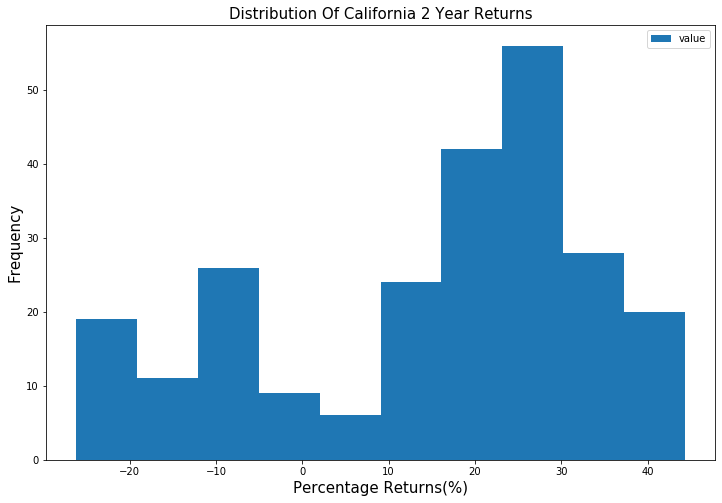

In [105]:
# Now lets have a look at the distribution of the 2 year and 5 year returns for all the states
california_2_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of California 2 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

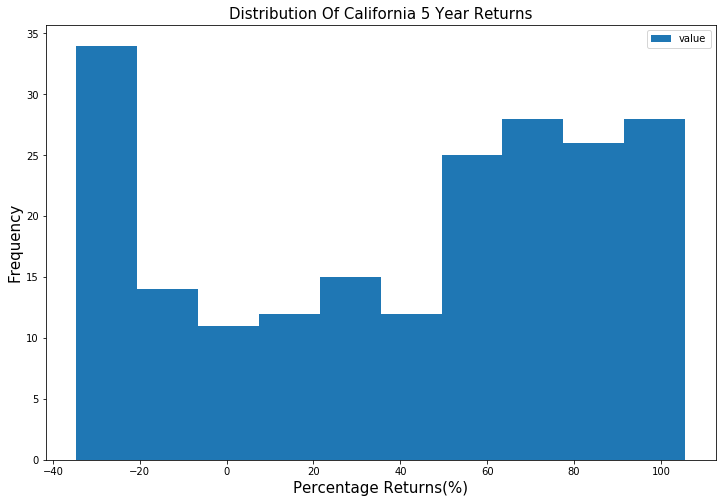

In [106]:
california_5_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of California 5 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

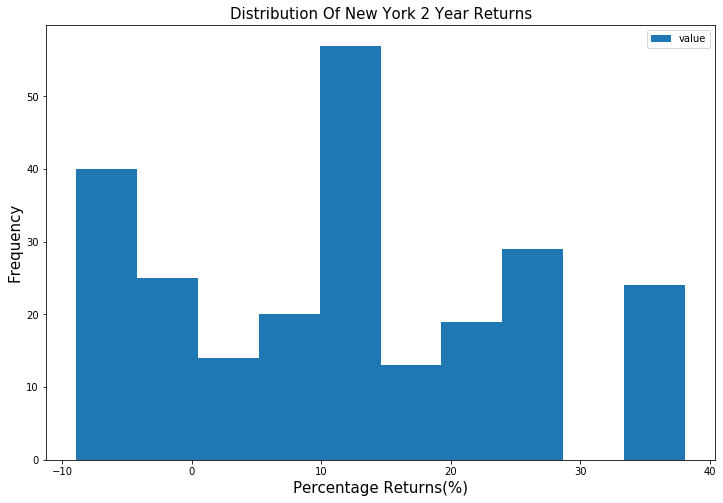

In [107]:
new_york_2_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of New York 2 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

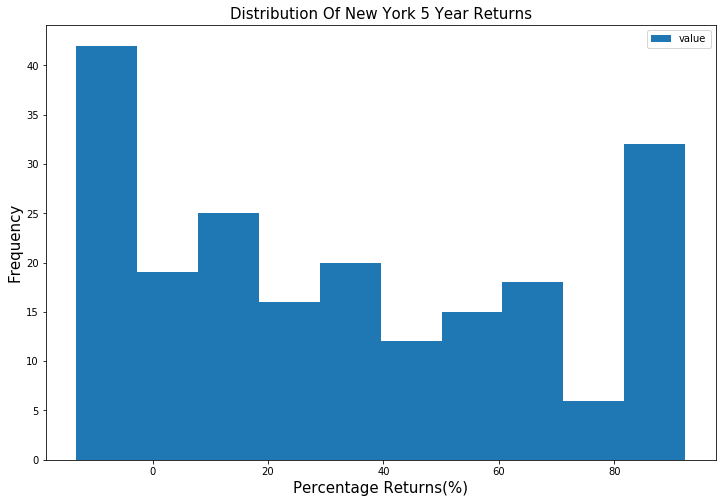

In [108]:
new_york_5_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of New York 5 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

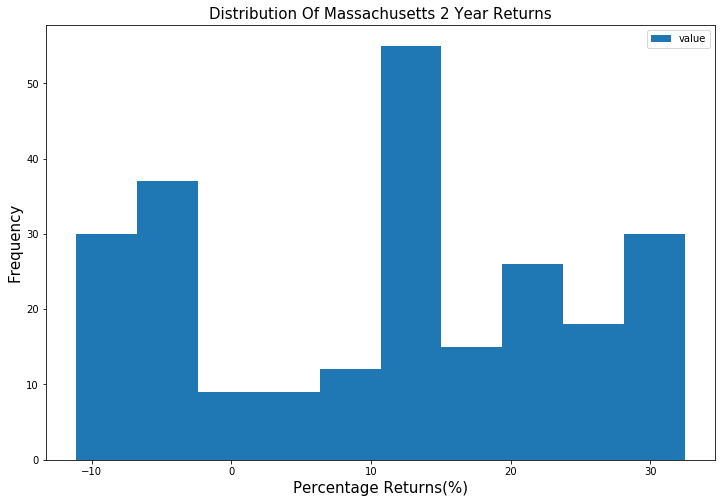

In [109]:
ma_2_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of Massachusetts 2 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

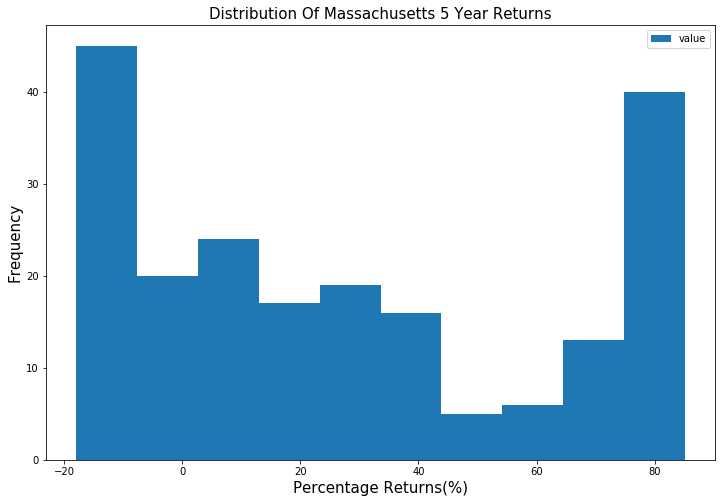

In [110]:
ma_5_year_returns.plot(kind = "hist", figsize = (12, 8), bins = 10)
plt.title("Distribution Of Massachusetts 5 Year Returns", fontsize = 15)
plt.xlabel("Percentage Returns(%)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

In [111]:
# Let's calculate the mean return and the std return for volatility

california_2_year_mean_returns = california_2_year_returns.mean()

In [112]:
california_2_year_mean_returns

value    14.55958
dtype: float64

In [113]:
new_york_2_year_mean_returns = new_york_2_year_returns.mean()

In [114]:
new_york_2_year_mean_returns

value    11.546779
dtype: float64

In [115]:
ma_2_year_mean_returns = ma_2_year_returns.mean()

In [116]:
ma_2_year_mean_returns

value    10.68933
dtype: float64

In [117]:
california_5_year_mean_returns = california_5_year_returns.mean()

In [118]:
california_5_year_mean_returns

value    40.443042
dtype: float64

In [119]:
new_york_5_year_mean_returns = new_york_5_year_returns.mean()

In [120]:
new_york_5_year_mean_returns

value    33.274168
dtype: float64

In [121]:
ma_5_year_mean_returns = ma_5_year_returns.mean()

In [122]:
ma_5_year_mean_returns

value    27.995891
dtype: float64

In [123]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [14.6, 11.5, 10.7]
)])
fig.update_layout(title_text='California, New York & Massachusetts 2 Year Mean Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns(%)')

fig.show()

In [124]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [40.4, 33.3, 28.0]
)])
fig.update_layout(title_text='California, New York & Massachusetts 5 Year Mean Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns(%)')

fig.show()

In [125]:
california_2_year_std_returns = california_2_year_returns.std()

In [126]:
california_2_year_std_returns

value    19.07276
dtype: float64

In [127]:
new_york_2_year_std_returns = new_york_2_year_returns.std()

In [128]:
new_york_2_year_std_returns

value    13.110547
dtype: float64

In [129]:
ma_2_year_std_returns = ma_2_year_returns.std()

In [130]:
ma_2_year_std_returns

value    13.316124
dtype: float64

In [131]:
california_5_year_std_returns = california_5_year_returns.std()

In [132]:
california_5_year_std_returns

value    45.664231
dtype: float64

In [133]:
new_york_5_year_std_returns = new_york_5_year_returns.std()

In [134]:
new_york_5_year_std_returns

value    34.922181
dtype: float64

In [135]:
ma_5_year_std_returns = ma_5_year_returns.std()

In [136]:
ma_5_year_std_returns

value    35.744053
dtype: float64

In [137]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [19.1, 13.1, 13.3]
)])
fig.update_layout(title_text='California, New York & Massachusetts 2 Year Standard Deviation Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns(%)')

fig.show()

In [138]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [45.7, 34.9, 35.7]
)])
fig.update_layout(title_text='California, New York & Massachusetts 5 Year Standard Deviation Returns',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns(%)')

fig.show()

## PHASE 2: Rolling Statistics Returns

In [139]:
# Let's Calculate The Rolling Statistics of 2 Year and 5 Year Periods For All States

california_ts.rolling(window = 24)

Rolling [window=24,center=False,axis=0]

In [140]:
california_ts_rs = california_ts.copy()

In [141]:
california_ts_rs["SMA24"] = california_ts_rs.value.rolling(window = 24, min_periods = 24).mean()

In [142]:
california_ts_rs["SMA60"] = california_ts_rs.value.rolling(window = 60, min_periods = 60).mean()

In [143]:
california_ts_rs

value          SMA24          SMA60
time                                                   
1996-04-01  197811.493725            NaN            NaN
1996-05-01  197721.720131            NaN            NaN
1996-06-01  197638.927386            NaN            NaN
1996-07-01  197574.028203            NaN            NaN
1996-08-01  197571.151144            NaN            NaN
...                   ...            ...            ...
2017-12-01  723263.480392  667922.280093  596238.588184
2018-01-01  729496.405229  672181.192130  600839.604847
2018-02-01  735525.980392  676556.515523  605437.284834
2018-03-01  742146.323529  681105.310458  610011.636198
2018-04-01  746329.084967  685728.240741  614504.804348

[265 rows x 3 columns]

In [144]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_ts_rs.index, y=california_ts_rs.SMA24, name='SMA(2 Years)',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=california_ts_rs.index, y=california_ts_rs.SMA60, name='SMA(5 Years)',
                        line_color='gray'))
fig.update_layout(title_text='California Simple Moving Average',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='ZHVI($)')

fig.show()


In [145]:
new_york_ts_rs = new_york_ts.copy()

In [146]:
new_york_ts_rs["SMA24"] = new_york_ts_rs.value.rolling(window = 24, min_periods = 24).mean()

In [147]:
new_york_ts_rs["SMA60"] = new_york_ts_rs.value.rolling(window = 60, min_periods = 60).mean()

In [148]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=new_york_ts_rs.index, y=new_york_ts_rs.SMA24, name='SMA(2 Years)',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_ts_rs.index, y=new_york_ts_rs.SMA60, name='SMA(5 Years)',
                        line_color='gray'))
fig.update_layout(title_text='New York Simple Moving Average',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='ZHVI($)')

fig.show()


In [149]:
ma_ts_rs = ma_ts.copy()

In [150]:
ma_ts_rs["SMA24"] = ma_ts_rs.value.rolling(window = 24, min_periods = 24).mean()

In [151]:
ma_ts_rs["SMA60"] = ma_ts_rs.value.rolling(window = 60, min_periods = 60).mean()

In [152]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=ma_ts_rs.index, y=ma_ts_rs.SMA24, name='SMA(2 Years)',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=ma_ts_rs.index, y=ma_ts_rs.SMA60, name='SMA(5 Years)',
                        line_color='gray'))
fig.update_layout(title_text='Massachusetts Simple Moving Average',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='ZHVI($)')

fig.show()


In [153]:
california_2_year_rolling = california_ts.pct_change().dropna().copy()

In [154]:
california_5_year_rolling = california_ts.pct_change().dropna().copy()

In [155]:
california_2_year_rolling["Returns"] = california_2_year_rolling.rolling(window = 24).mean()*12

In [156]:
california_2_year_rolling["Risk"] = california_2_year_rolling.value.rolling(window = 24).std()*np.sqrt(12)

In [157]:
california_5_year_rolling["Returns"] = california_5_year_rolling.rolling(window = 60).mean()*12

In [158]:
california_5_year_rolling["Risk"] = california_5_year_rolling.value.rolling(window = 60).std()*np.sqrt(12)

In [159]:
new_york_2_year_rolling = new_york_ts.pct_change().dropna().copy()

In [160]:
new_york_5_year_rolling = new_york_ts.pct_change().dropna().copy()

In [161]:
new_york_2_year_rolling["Returns"] = new_york_2_year_rolling.rolling(window = 24).mean()*12

In [162]:
new_york_2_year_rolling["Risk"] = new_york_2_year_rolling.value.rolling(window = 24).std()*np.sqrt(12)

In [163]:
new_york_5_year_rolling["Returns"] = new_york_5_year_rolling.rolling(window = 60).mean()*12

In [164]:
new_york_5_year_rolling["Risk"] = new_york_5_year_rolling.value.rolling(window = 60).std()*np.sqrt(12)

In [165]:
ma_2_year_rolling = ma_ts.pct_change().dropna().copy()

In [166]:
ma_5_year_rolling = ma_ts.pct_change().dropna().copy()

In [167]:
ma_2_year_rolling["Returns"] = ma_2_year_rolling.rolling(window = 24).mean()*12

In [168]:
ma_2_year_rolling["Risk"] = ma_2_year_rolling.value.rolling(window = 24).std()*np.sqrt(12)

In [169]:
ma_5_year_rolling["Returns"] = ma_5_year_rolling.rolling(window = 60).mean()*12

In [170]:
ma_5_year_rolling["Risk"] = ma_5_year_rolling.value.rolling(window = 60).std()*np.sqrt(12)

In [171]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_2_year_rolling.index, y=california_2_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=california_2_year_rolling.index, y=california_2_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='California 2 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

In [172]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=california_5_year_rolling.index, y=california_5_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=california_5_year_rolling.index, y=california_5_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='California 5 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

In [173]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=new_york_2_year_rolling.index, y=new_york_2_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_2_year_rolling.index, y=new_york_2_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='New York 2 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

In [174]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=new_york_5_year_rolling.index, y=new_york_5_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=new_york_5_year_rolling.index, y=new_york_5_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='New York 5 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

In [175]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=ma_2_year_rolling.index, y=ma_2_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=ma_2_year_rolling.index, y=ma_2_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='Massachusetts 2 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

In [176]:
fig = go.Figure()
colorway = ['#f3cec9', '#e7a4b6', '#cd7eaf', '#a262a9', '#6f4d96', '#3d3b72', '#182844']
fig.add_trace(go.Scatter(x=ma_5_year_rolling.index, y=ma_5_year_rolling.Returns, name='Actual Returns',
                        line_color='olive'))
fig.add_trace(go.Scatter(x=ma_5_year_rolling.index, y=ma_5_year_rolling.Risk, name='Risk',
                        line_color='gray'))
fig.update_layout(title_text='Massachusetts 5 Year Rolling Risk And Return',
                  colorway=colorway, xaxis_rangeslider_visible=True, xaxis_title='Time', yaxis_title='Risk And Return(%)')

fig.show()

## PREDICTIONS

In [177]:
california_2_year_returns.dropna(inplace = True)

In [178]:
california_2_year_returns.head()

value
time                 
1998-04-01  11.529405
1998-05-01  12.448784
1998-06-01  13.355514
1998-07-01  14.239322
1998-08-01  15.088795

In [179]:
california_2_year_returns.tail()

value
time                 
2017-12-01  16.047195
2018-01-01  16.294714
2018-02-01  16.654199
2018-03-01  17.247290
2018-04-01  17.462077

In [180]:
california_model = ARIMA(california_2_year_returns['value'], order=(3,1,1))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [181]:
california_results = california_model.fit()

In [182]:
start = "2008-05-01"
end = "2028-05-01"

In [183]:
california_predictions = california_results.predict(start, end, typ='levels').rename('CALIFORNIA 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

In [184]:
california_model = ARIMA(california_2_year_returns['value'], order=(3,1,1))
california_results = california_model.fit()
start = "2008-05-01"
end = "2028-05-01"
california_predictions = california_results.predict(start, end, typ='levels').rename('CALIFORNIA 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



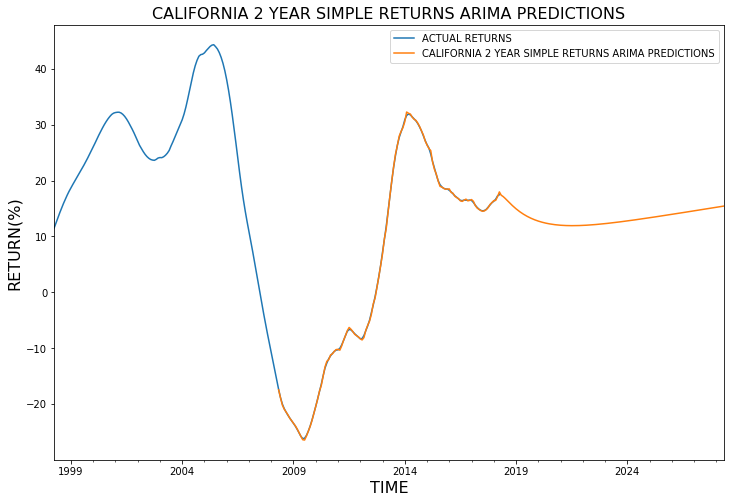

In [185]:
california_2_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("CALIFORNIA 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS", size=16)
california_predictions.plot(legend = True)

In [186]:
new_york_2_year_returns.dropna(inplace = True)

In [187]:
new_york_2_year_returns.head()

value
time                
1998-04-01  4.264746
1998-05-01  4.771565
1998-06-01  5.293850
1998-07-01  5.830319
1998-08-01  6.376924

In [188]:
new_york_2_year_returns.tail()

value
time                 
2017-12-01   9.939554
2018-01-01  10.098236
2018-02-01  10.180394
2018-03-01  10.383581
2018-04-01  10.515278

In [189]:
new_york_model = ARIMA(new_york_2_year_returns['value'], order=(3,1,1))
new_york_results = new_york_model.fit()
start = "2008-05-01"
end = "2028-05-01"
new_york_predictions = new_york_results.predict(start, end, typ='levels').rename('NEW YORK 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



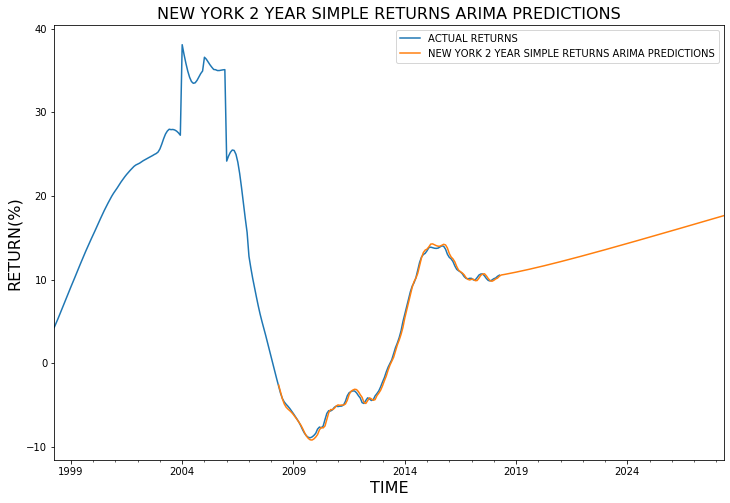

In [190]:
new_york_2_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("NEW YORK 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS", size=16)
new_york_predictions.plot(legend = True)

In [191]:
ma_2_year_returns.dropna(inplace = True)

In [192]:
ma_2_year_returns.head()

value
time                 
1998-04-01  12.095233
1998-05-01  12.680538
1998-06-01  13.275706
1998-07-01  13.875002
1998-08-01  14.479482

In [193]:
ma_2_year_returns.head()

value
time                 
1998-04-01  12.095233
1998-05-01  12.680538
1998-06-01  13.275706
1998-07-01  13.875002
1998-08-01  14.479482

In [194]:
ma_2_year_returns.tail()

value
time                 
2017-12-01  14.571706
2018-01-01  14.690604
2018-02-01  14.947524
2018-03-01  15.360685
2018-04-01  15.386068

In [195]:
ma_model = ARIMA(ma_2_year_returns['value'], order=(3,1,1))
ma_results = ma_model.fit()
start = "2008-05-01"
end = "2028-05-01"
ma_predictions = ma_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



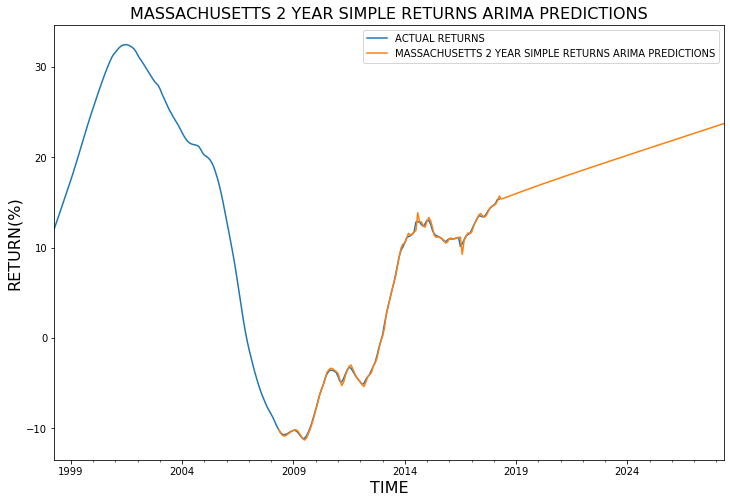

In [196]:
ma_2_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("MASSACHUSETTS 2 YEAR SIMPLE RETURNS ARIMA PREDICTIONS", size=16)
ma_predictions.plot(legend = True)

In [197]:
california_5_year_returns.dropna(inplace = True)

In [198]:
california_5_year_returns.head()

value
time                 
2001-04-01  62.764642
2001-05-01  64.064151
2001-06-01  65.303290
2001-07-01  66.484665
2001-08-01  67.598135

In [199]:
california_5_year_returns.tail()

value
time                 
2017-12-01  61.669705
2018-01-01  60.882101
2018-02-01  60.013421
2018-03-01  58.685000
2018-04-01  56.548781

In [200]:
california_5_year_model = ARIMA(california_5_year_returns['value'], order=(3,1,1))
california_5_year_results = california_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
california_5_year_predictions = california_5_year_results.predict(start, end, typ='levels').rename('CALIFORNIA 5 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



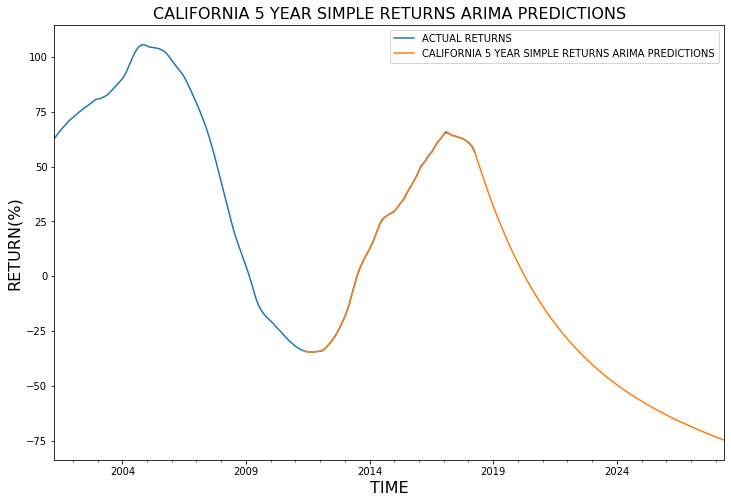

In [201]:
california_5_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("CALIFORNIA 5 YEAR SIMPLE RETURNS ARIMA PREDICTIONS", size=16)
california_5_year_predictions.plot(legend = True)

In [202]:
ma_5_year_returns.dropna(inplace = True)

In [203]:
ma_5_year_returns.head()

value
time                 
2001-04-01  64.446022
2001-05-01  65.895027
2001-06-01  67.326995
2001-07-01  68.741581
2001-08-01  70.116967

In [204]:
ma_5_year_model = ARIMA(ma_5_year_returns['value'], order=(3,1,1))
ma_5_year_results = ma_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
ma_5_year_predictions = ma_5_year_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 5 YEAR SIMPLE RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



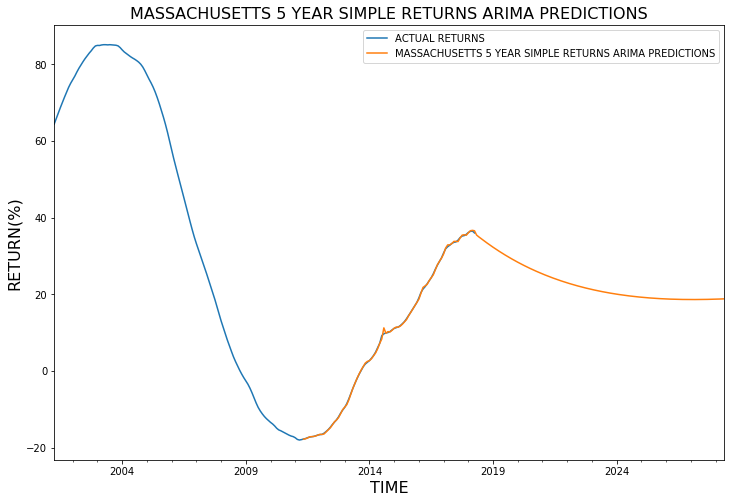

In [205]:
ma_5_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("MASSACHUSETTS 5 YEAR SIMPLE RETURNS ARIMA PREDICTIONS", size=16)
ma_5_year_predictions.plot(legend = True)

In [206]:
new_york_5_year_returns.dropna(inplace = True)

In [207]:
new_york_5_year_model = SARIMAX(new_york_5_year_returns['value'], order=(3,1,1))
new_york_5_year_results = new_york_5_year_model.fit(transparams = False)
start = "2011-05-01"
end = "2028-05-01"
new_york_5_year_predictions = new_york_5_year_results.predict(start, end,  typ='levels').rename('NEW YORK 5 YEAR SIMPLE RETURNS SARIMAX PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



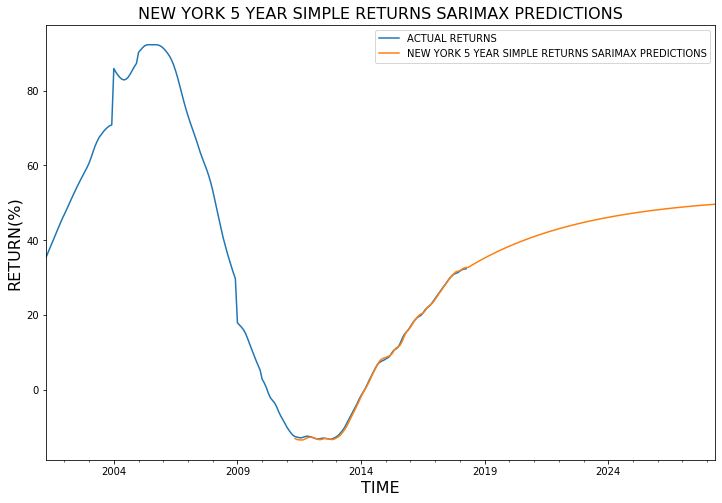

In [208]:
new_york_5_year_returns['value'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("NEW YORK 5 YEAR SIMPLE RETURNS SARIMAX PREDICTIONS", size=16)
new_york_5_year_predictions.plot(legend = True)

In [209]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
print("The rmse for California 2 Year Simple Returns is: ", rmse(california_2_year_returns['value'].iloc [-241:], california_predictions))
print("The mae for California 2 Year Simple Returns is: ", mean_absolute_error(california_2_year_returns['value'].iloc [-241:], california_predictions))

The rmse for California 2 Year Simple Returns is:  25.19111916265708
The mae for California 2 Year Simple Returns is:  20.535610706253202


In [210]:
print("The rmse for New York 2 Year Simple Returns is: ", rmse(new_york_2_year_returns['value'].iloc [-241:], new_york_predictions))
print("The mae for New York 2 Year Simple Returns ia: ", mean_absolute_error(new_york_2_year_returns['value'].iloc [-241:], new_york_predictions))

The rmse for New York 2 Year Simple Returns is:  17.715320465748167
The mae for New York 2 Year Simple Returns ia:  15.660991962053291


In [211]:
print("The rmse for Massachusetts 2 Year Simple Returns is: ", rmse(ma_2_year_returns['value'].iloc [-241:], ma_predictions))
print("The mae for Massachusetts 2 Year Simple Returns ia: ", mean_absolute_error(ma_2_year_returns['value'].iloc [-241:], ma_predictions))

The rmse for Massachusetts 2 Year Simple Returns is:  21.60783491515043
The mae for Massachusetts 2 Year Simple Returns ia:  19.271958602268185


In [212]:
print("The rmse for California 5 Year Simple Returns is: ", rmse(california_5_year_returns['value'].iloc [-205:], california_5_year_predictions))
print("The mae for California 5 Year Simple Returns is: ", mean_absolute_error(california_5_year_returns['value'].iloc [-205:], california_5_year_predictions))

The rmse for California 5 Year Simple Returns is:  74.74380812666699
The mae for California 5 Year Simple Returns is:  61.727278228349334


In [213]:
print("The rmse for Massachusetts 5 Year Simple Returns is: ", rmse(ma_5_year_returns['value'].iloc [-205:], ma_5_year_predictions))
print("The mae for Massachusetts 5 Year Simple Returns is: ", mean_absolute_error(ma_5_year_returns['value'].iloc [-205:], ma_5_year_predictions))

The rmse for Massachusetts 5 Year Simple Returns is:  48.179985724497904
The mae for Massachusetts 5 Year Simple Returns is:  38.690482517275115


In [214]:
print("The rmse for New York 5 Year Simple Returns is: ", rmse(new_york_5_year_returns['value'].iloc [-205:], new_york_5_year_predictions))
print("The mae for New York 5 Year Simple Returns is: ", mean_absolute_error(new_york_5_year_returns['value'].iloc [-205:], new_york_5_year_predictions))

The rmse for New York 5 Year Simple Returns is:  52.17803721689149
The mae for New York 5 Year Simple Returns is:  47.692196496431755


In [215]:
california_2_year_rolling.dropna(inplace = True)

In [216]:
california_2_year_rolling.head()

value   Returns      Risk
time                                    
1998-04-01  0.007957  0.054745  0.011352
1998-05-01  0.007786  0.058865  0.010940
1998-06-01  0.007641  0.062895  0.010363
1998-07-01  0.007466  0.066792  0.009616
1998-08-01  0.007421  0.070510  0.008764

In [217]:
california_2_year_rolling.tail()

value   Returns      Risk
time                                    
2017-12-01  0.009072  0.074661  0.005846
2018-01-01  0.008618  0.075734  0.006086
2018-02-01  0.008265  0.077288  0.006175
2018-03-01  0.009001  0.079840  0.006133
2018-04-01  0.005636  0.080759  0.005815

In [218]:
california_2_year_model = ARIMA(california_2_year_rolling['Returns'], order=(3,1,1))
california_2_year_results = california_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
california_2_year_predictions = california_2_year_results.predict(start, end, typ='levels').rename('CALIFORNIA 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



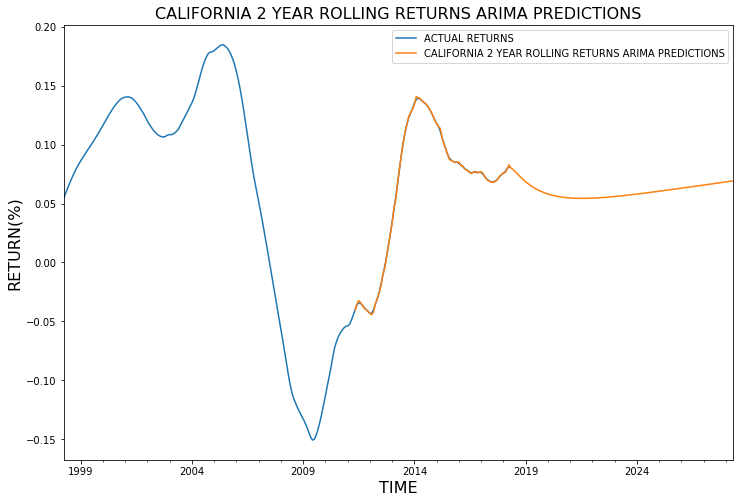

In [219]:
california_2_year_rolling['Returns'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("CALIFORNIA 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS", size=16)
california_2_year_predictions.plot(legend = True)

In [220]:
print("The rmse for California 2 Year Rolling Returns is: ", rmse(california_2_year_rolling['Returns'].iloc [-205:], california_2_year_predictions))
print("The mae for California 2 Year Rolling Returns is: ", mean_absolute_error(california_2_year_rolling['Returns'].iloc [-205:], california_2_year_predictions))

The rmse for California 2 Year Rolling Returns is:  0.09962404305566773
The mae for California 2 Year Rolling Returns is:  0.07848561223653591


In [221]:
california_2_year_std_returns_pred = california_predictions.std()
california_2_year_std_returns_pred

13.913832972726048

In [222]:
california_5_year_std_returns_pred = california_5_year_predictions.std()
california_5_year_std_returns_pred

44.37657150260659

In [223]:
new_york_2_year_std_returns_pred = new_york_predictions.std()
new_york_2_year_std_returns_pred

8.362026078161733

In [224]:
new_york_5_year_std_returns_pred = new_york_5_year_predictions.std()
new_york_5_year_std_returns_pred

21.546556218803925

In [225]:
ma_2_year_std_returns_pred = ma_predictions.std()
ma_2_year_std_returns_pred

10.792500741409526

In [226]:
ma_5_year_std_returns_pred = ma_5_year_predictions.std()
ma_5_year_std_returns_pred

14.013273693337725

In [227]:
new_york_2_year_rolling.dropna(inplace = True)

In [228]:
new_york_2_year_rolling.head()

value   Returns      Risk
time                                    
1998-04-01  0.004085  0.020917  0.005969
1998-05-01  0.004309  0.023346  0.005984
1998-06-01  0.004452  0.025837  0.005945
1998-07-01  0.004504  0.028383  0.005809
1998-08-01  0.004660  0.030964  0.005623

In [229]:
new_york_2_year_rolling.tail()

value   Returns      Risk
time                                    
2017-12-01  0.003431  0.047481  0.003878
2018-01-01  0.004677  0.048205  0.003871
2018-02-01  0.004540  0.048580  0.003885
2018-03-01  0.004782  0.049504  0.003828
2018-04-01  0.004281  0.050103  0.003750

In [230]:
new_york_2_year_model = ARIMA(new_york_2_year_rolling['Returns'], order=(3,1,1))
new_york_2_year_results = new_york_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
new_york_2_year_predictions = new_york_2_year_results.predict(start, end, typ='levels').rename('NEW YORK 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



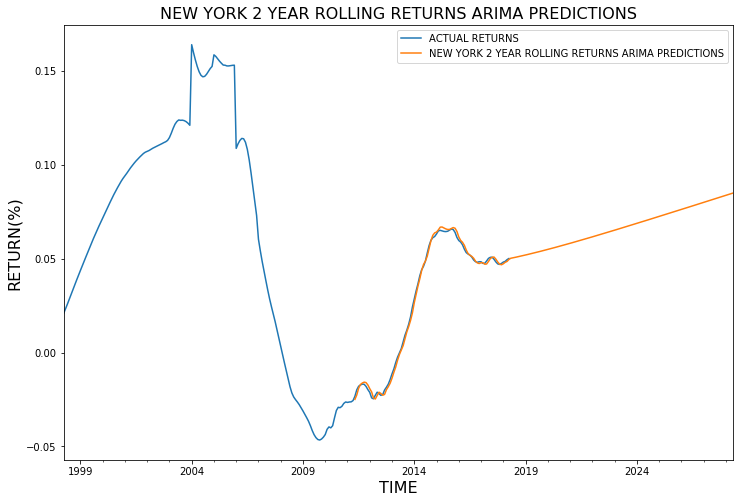

In [231]:
new_york_2_year_rolling['Returns'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("NEW YORK 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS", size=16)
new_york_2_year_predictions.plot(legend = True)

In [232]:
print("The rmse for New York 2 Year Rolling Returns is: ", rmse(new_york_2_year_rolling['Returns'].iloc [-205:], new_york_2_year_predictions))
print("The mae for New York 2 Year Rolling Returns is: ", mean_absolute_error(new_york_2_year_rolling['Returns'].iloc [-205:], new_york_2_year_predictions))

The rmse for New York 2 Year Rolling Returns is:  0.07860865072045346
The mae for New York 2 Year Rolling Returns is:  0.06911298971566142


In [233]:
ma_2_year_rolling.dropna(inplace = True)

In [234]:
ma_2_year_rolling.head()

value   Returns      Risk
time                                    
1998-04-01  0.007363  0.057247  0.006813
1998-05-01  0.007400  0.059864  0.006775
1998-06-01  0.007494  0.062511  0.006671
1998-07-01  0.007529  0.065162  0.006485
1998-08-01  0.007554  0.067822  0.006203

In [235]:
ma_2_year_rolling.tail()

value   Returns      Risk
time                                    
2017-12-01  0.005293  0.068217  0.004193
2018-01-01  0.005240  0.068738  0.004063
2018-02-01  0.006242  0.069862  0.003869
2018-03-01  0.006907  0.071666  0.003462
2018-04-01  0.004157  0.071776  0.003397

In [236]:
ma_2_year_model = ARIMA(ma_2_year_rolling['Returns'], order=(3,1,1))
ma_2_year_results = ma_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
ma_2_year_predictions = ma_2_year_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



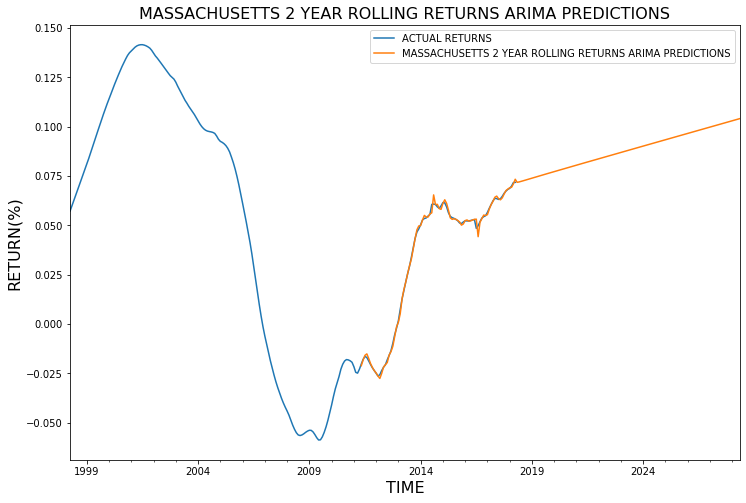

In [237]:
ma_2_year_rolling['Returns'].rename('ACTUAL RETURNS').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("MASSACHUSETTS 2 YEAR ROLLING RETURNS ARIMA PREDICTIONS", size=16)
ma_2_year_predictions.plot(legend = True)

In [238]:
print("The rmse for Massachusetts 2 Year Rolling Returns is: ", rmse(ma_2_year_rolling['Returns'].iloc [-205:], ma_2_year_predictions))
print("The mae for Massachusetts 2 Year Rolling Returns is: ", mean_absolute_error(ma_2_year_rolling['Returns'].iloc [-205:], ma_2_year_predictions))

The rmse for Massachusetts 2 Year Rolling Returns is:  0.0889831280839212
The mae for Massachusetts 2 Year Rolling Returns is:  0.07777670317373057


In [239]:
california_2_year_model = ARIMA(california_2_year_rolling['Risk'], order=(3,1,1))
california_2_year_results = california_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
california_2_year_predictions_risk = california_2_year_results.predict(start, end, typ='levels').rename('CALIFORNIA 2 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



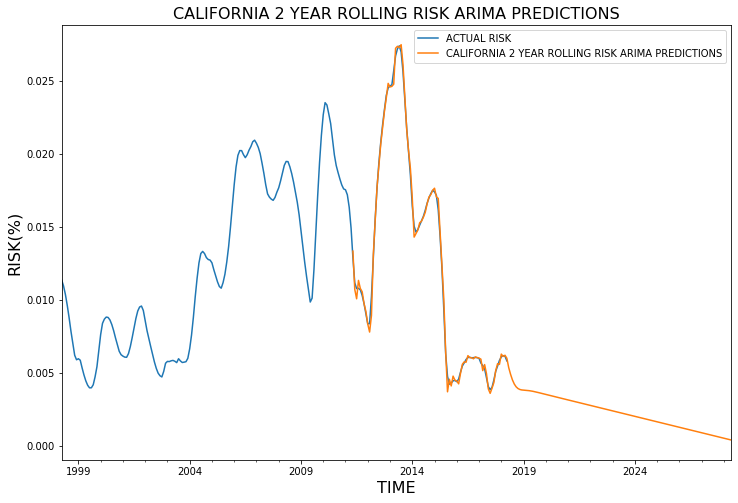

In [240]:
california_2_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("CALIFORNIA 2 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
california_2_year_predictions_risk.plot(legend = True)

In [241]:
print("The rmse for California 2 Year Rolling Risk is: ", rmse(california_2_year_rolling['Risk'].iloc [-205:], california_2_year_predictions_risk))
print("The mae for California 2 Year Rolling Risk is: ", mean_absolute_error(california_2_year_rolling['Risk'].iloc [-205:], california_2_year_predictions_risk))

The rmse for California 2 Year Rolling Risk is:  0.012807919315511809
The mae for California 2 Year Rolling Risk is:  0.011199583875396255


In [242]:
new_york_2_year_model = ARIMA(new_york_2_year_rolling['Risk'], order=(3,1,1))
new_york_2_year_results = new_york_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
new_york_2_year_predictions_risk = new_york_2_year_results.predict(start, end, typ='levels').rename('NEW YORK 2 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



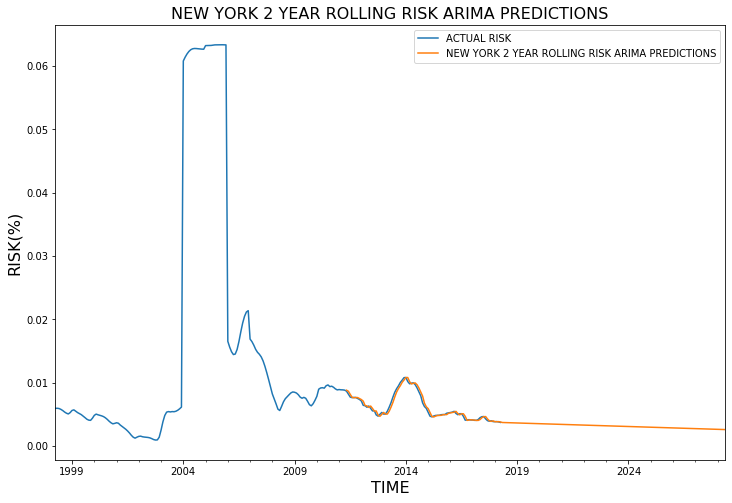

In [243]:
new_york_2_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("NEW YORK 2 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
new_york_2_year_predictions_risk.plot(legend = True)

In [244]:
print("The rmse for New York 2 Year Rolling Risk is: ", rmse(new_york_2_year_rolling['Risk'].iloc [-205:], new_york_2_year_predictions_risk))
print("The mae for New York 2 Year Rolling Risk is: ", mean_absolute_error(new_york_2_year_rolling['Risk'].iloc [-205:], new_york_2_year_predictions_risk))

The rmse for New York 2 Year Rolling Risk is:  0.019896484050129223
The mae for New York 2 Year Rolling Risk is:  0.010682755713715608


In [245]:
ma_2_year_model = ARIMA(ma_2_year_rolling['Risk'], order=(3,1,1))
ma_2_year_results = ma_2_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
ma_2_year_predictions_risk = ma_2_year_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 2 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



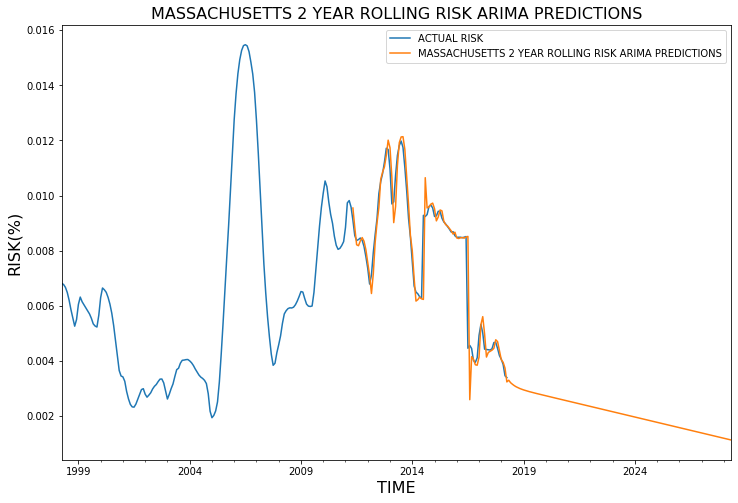

In [246]:
ma_2_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("MASSACHUSETTS 2 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
ma_2_year_predictions_risk.plot(legend = True)

In [247]:
california_5_year_rolling.dropna(inplace = True)

In [248]:
california_5_year_model = ARIMA(california_5_year_rolling['Returns'], order=(3,1,1))
california_5_year_results = california_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
california_5_year_predictions_returns = california_5_year_results.predict(start, end, typ='levels').rename('CALIFORNIA 5 YEAR ROLLING RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



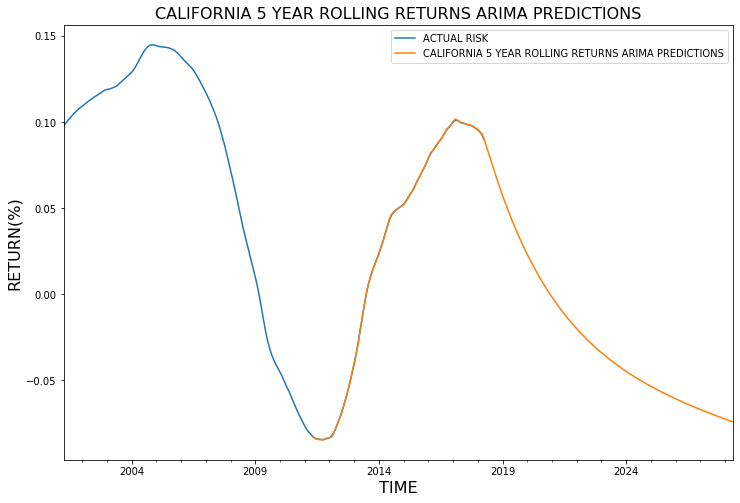

In [249]:
california_5_year_rolling['Returns'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("CALIFORNIA 5 YEAR ROLLING RETURNS ARIMA PREDICTIONS", size=16)
california_5_year_predictions_returns.plot(legend = True)

In [250]:
new_york_5_year_rolling.dropna(inplace = True)

In [251]:
new_york_5_year_model = SARIMAX(new_york_5_year_rolling['Returns'], order=(3,1,1))
new_york_5_year_results = new_york_5_year_model.fit(transparams = False)
start = "2011-05-01"
end = "2028-05-01"
new_york_5_year_predictions_returns = new_york_5_year_results.predict(start, end, typ='levels').rename('NEW YORK 5 YEAR ROLLING RETURNS SARIMAX PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



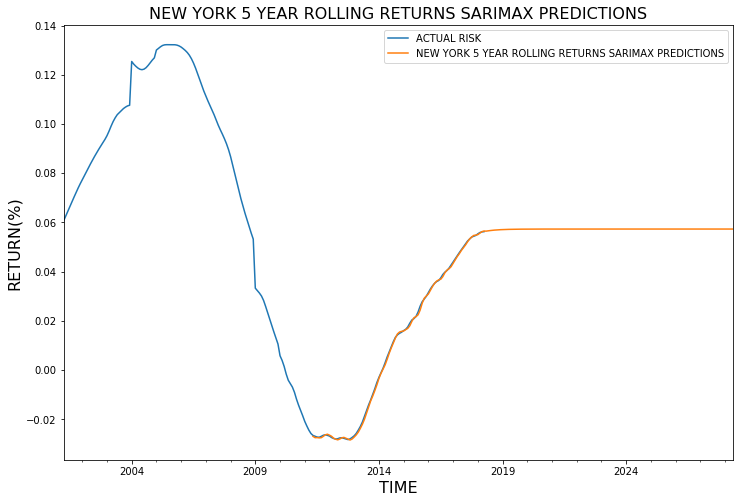

In [252]:
new_york_5_year_rolling['Returns'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("NEW YORK 5 YEAR ROLLING RETURNS SARIMAX PREDICTIONS", size=16)
new_york_5_year_predictions_returns.plot(legend = True)

In [253]:
ma_5_year_rolling.dropna(inplace = True)

In [254]:
ma_5_year_model = ARIMA(ma_5_year_rolling['Returns'], order=(3,1,1))
ma_5_year_results = ma_5_year_model.fit(transparams = False)
start = "2011-05-01"
end = "2028-05-01"
ma_5_year_predictions_returns = ma_5_year_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 5 YEAR ROLLING RETURNS ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



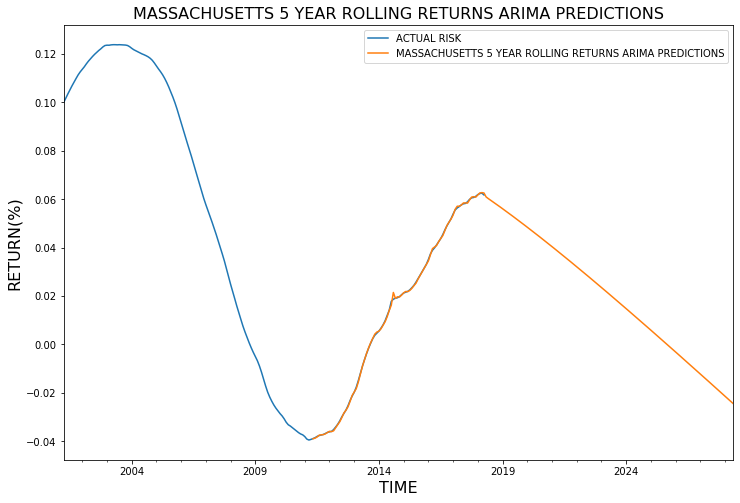

In [255]:
ma_5_year_rolling['Returns'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RETURN(%)", size = 16)
plt.title("MASSACHUSETTS 5 YEAR ROLLING RETURNS ARIMA PREDICTIONS", size=16)
ma_5_year_predictions_returns.plot(legend = True)

In [256]:
print("The rmse for California 5 Year Rolling Returns is: ", rmse(california_5_year_rolling['Returns'].iloc [-205:], california_5_year_predictions_returns))
print("The mae for California 5 Year Rolling Returns is: ", mean_absolute_error(california_5_year_rolling['Returns'].iloc [-205:], california_5_year_predictions_returns))

The rmse for California 5 Year Rolling Returns is:  0.1063477007189252
The mae for California 5 Year Rolling Returns is:  0.0913142423634832


In [257]:
print("The rmse for New York 5 Year Rolling Returns is: ", rmse(new_york_5_year_rolling['Returns'].iloc [-205:], new_york_5_year_predictions_returns))
print("The mae for New York 5 Year Rolling Returns is: ", mean_absolute_error(new_york_5_year_rolling['Returns'].iloc [-205:], new_york_5_year_predictions_returns))

The rmse for New York 5 Year Rolling Returns is:  0.07595724210879856
The mae for New York 5 Year Rolling Returns is:  0.06606833349497479


In [258]:
print("The rmse for Massachusetts 5 Year Rolling Returns is: ", rmse(ma_5_year_rolling['Returns'].iloc [-205:], ma_5_year_predictions_returns))
print("The mae for Massachusetts 5 Year Rolling Returns is: ", mean_absolute_error(ma_5_year_rolling['Returns'].iloc [-205:], ma_5_year_predictions_returns))

The rmse for Massachusetts 5 Year Rolling Returns is:  0.07922314390752377
The mae for Massachusetts 5 Year Rolling Returns is:  0.06761403230079023


In [259]:
california_5_year_model = ARIMA(california_5_year_rolling['Risk'], order=(3,1,1))
california_5_year_results = california_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
california_5_year_predictions_risk = california_5_year_results.predict(start, end, typ='levels').rename('CALIFORNIA 5 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



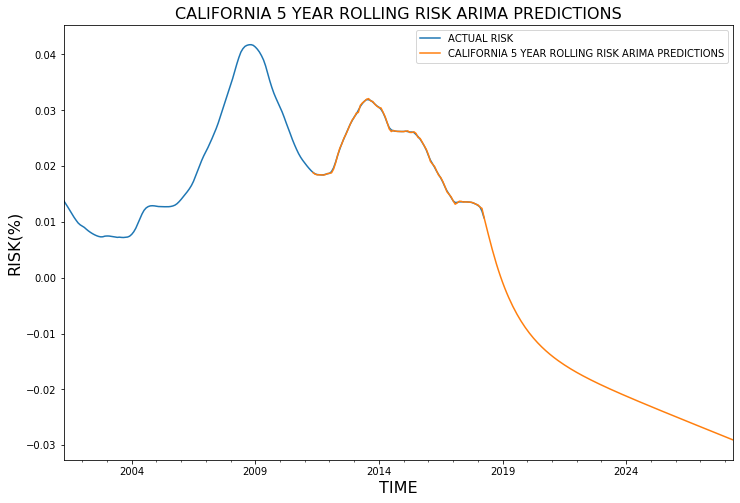

In [260]:
california_5_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("CALIFORNIA 5 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
california_5_year_predictions_risk.plot(legend = True)

In [261]:
new_york_5_year_model = ARIMA(new_york_5_year_rolling['Risk'], order=(3,1,1))
new_york_5_year_results = new_york_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
new_york_5_year_predictions_risk = new_york_5_year_results.predict(start, end, typ='levels').rename('NEW YORK 5 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



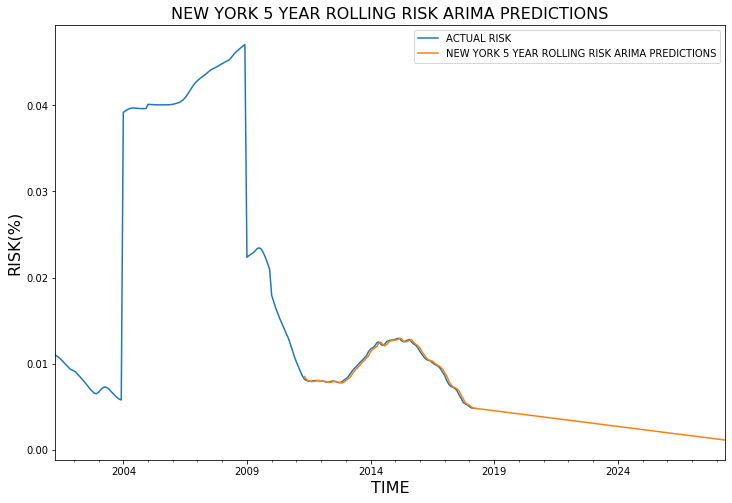

In [262]:
new_york_5_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("NEW YORK 5 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
new_york_5_year_predictions_risk.plot(legend = True)

In [263]:
ma_5_year_model = ARIMA(ma_5_year_rolling['Risk'], order=(3,1,1))
ma_5_year_results = ma_5_year_model.fit()
start = "2011-05-01"
end = "2028-05-01"
ma_5_year_predictions_risk = ma_5_year_results.predict(start, end, typ='levels').rename('MASSACHUSETTS 5 YEAR ROLLING RISK ARIMA PREDICTIONS')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



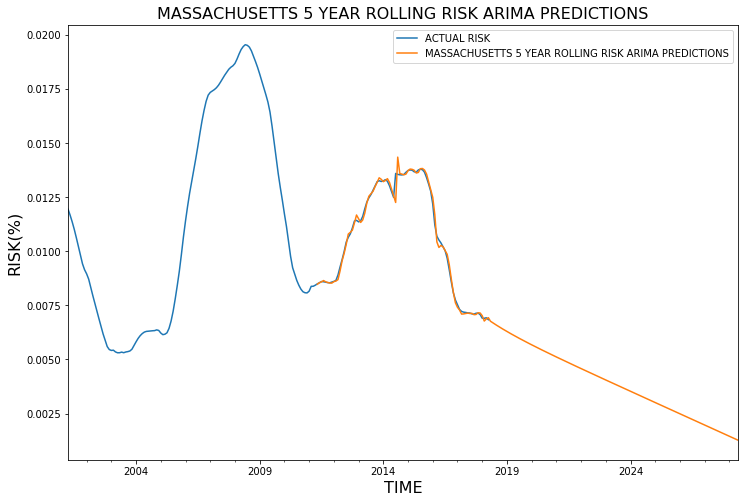

In [264]:
ma_5_year_rolling['Risk'].rename('ACTUAL RISK').plot(legend = True, figsize=(12,8))
plt.xlabel("TIME", size=16)
plt.ylabel("RISK(%)", size = 16)
plt.title("MASSACHUSETTS 5 YEAR ROLLING RISK ARIMA PREDICTIONS", size=16)
ma_5_year_predictions_risk.plot(legend = True)

In [265]:
print("The rmse for California 5 Year Rolling Risk is: ", rmse(california_5_year_rolling['Risk'].iloc [-205:], california_5_year_predictions_risk))
print("The mae for California 5 Year Rolling Risk is: ", mean_absolute_error(california_5_year_rolling['Risk'].iloc [-205:], california_5_year_predictions_risk))

The rmse for California 5 Year Rolling Risk is:  0.03475898245923904
The mae for California 5 Year Rolling Risk is:  0.031090762927342332


In [266]:
print("The rmse for New York 5 Year Rolling Risk is: ", rmse(new_york_5_year_rolling['Risk'].iloc [-205:], new_york_5_year_predictions_risk))
print("The mae for New York 5 Year Rolling Risk is: ", mean_absolute_error(new_york_5_year_rolling['Risk'].iloc [-205:], new_york_5_year_predictions_risk))

The rmse for New York 5 Year Rolling Risk is:  0.019341539189960653
The mae for New York 5 Year Rolling Risk is:  0.014606595922548466


In [267]:
print("The rmse for Massachusetts 5 Year Rolling Risk is: ", rmse(ma_5_year_rolling['Risk'].iloc [-205:], ma_5_year_predictions_risk))
print("The mae for Massachusetts 5 Year Rolling Risk is: ", mean_absolute_error(ma_5_year_rolling['Risk'].iloc [-205:], ma_5_year_predictions_risk))

The rmse for Massachusetts 5 Year Rolling Risk is:  0.0077549455557941295
The mae for Massachusetts 5 Year Rolling Risk is:  0.007087704359496293


In [268]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [13.9, 4.2, 4.2]
)])
fig.update_layout(title_text='California, New York & Massachusetts 2 Year Standard Deviation Returns Predictions',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns Predictions(%)')

fig.show()

In [269]:
states = ['California', 'New York', 'Massachusetts']

fig = go.Figure([go.Bar(x=states, y = [44.4, 21.5, 14.0]
)])
fig.update_layout(title_text='California, New York & Massachusetts 5 Year Standard Deviation Returns Predictions',
                  colorway=colorway, xaxis_rangeslider_visible=True, yaxis_title='Returns Predictions(%)')

fig.show()

In [330]:
# Time To Figure Out The Best Zipcodes To Invest Into For All The Three States

california_2_year_rolling

value   Returns      Risk
time                                    
1998-04-01  0.007957  0.054745  0.011352
1998-05-01  0.007786  0.058865  0.010940
1998-06-01  0.007641  0.062895  0.010363
1998-07-01  0.007466  0.066792  0.009616
1998-08-01  0.007421  0.070510  0.008764
...              ...       ...       ...
2017-12-01  0.009072  0.074661  0.005846
2018-01-01  0.008618  0.075734  0.006086
2018-02-01  0.008265  0.077288  0.006175
2018-03-01  0.009001  0.079840  0.006133
2018-04-01  0.005636  0.080759  0.005815

[241 rows x 3 columns]

In [331]:
california_ts_rs

value          SMA24          SMA60
time                                                   
1996-04-01  197811.493725            NaN            NaN
1996-05-01  197721.720131            NaN            NaN
1996-06-01  197638.927386            NaN            NaN
1996-07-01  197574.028203            NaN            NaN
1996-08-01  197571.151144            NaN            NaN
...                   ...            ...            ...
2017-12-01  723263.480392  667922.280093  596238.588184
2018-01-01  729496.405229  672181.192130  600839.604847
2018-02-01  735525.980392  676556.515523  605437.284834
2018-03-01  742146.323529  681105.310458  610011.636198
2018-04-01  746329.084967  685728.240741  614504.804348

[265 rows x 3 columns]

In [336]:
california_2_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2005-06-01  0.011734  0.184828  0.010796
2005-05-01  0.012239  0.184528  0.010910
2005-04-01  0.012886  0.183675  0.011228
2005-07-01  0.010851  0.183594  0.011179
2005-03-01  0.012763  0.182419  0.011644

In [337]:
new_york_2_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2004-01-01  0.095636  0.164032  0.060792
2004-02-01  0.000951  0.159749  0.061396
2005-01-01  0.024715  0.158634  0.063216
2005-02-01  0.011982  0.157786  0.063221
2005-03-01  0.011479  0.156500  0.063228

In [338]:
ma_2_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2001-07-01  0.010700  0.141505  0.002323
2001-06-01  0.010851  0.141485  0.002333
2001-05-01  0.010998  0.141298  0.002425
2001-08-01  0.010403  0.141289  0.002434
2001-09-01  0.010218  0.140929  0.002610

In [339]:
california_5_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2004-11-01  0.014264  0.145060  0.012896
2004-12-01  0.013402  0.144881  0.012870
2004-10-01  0.016009  0.144819  0.012865
2005-01-01  0.013044  0.144471  0.012805
2004-09-01  0.017452  0.144094  0.012741

In [340]:
new_york_5_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2005-06-01  0.008852  0.132213  0.040041
2005-09-01  0.008530  0.132208  0.040041
2005-07-01  0.008462  0.132200  0.040041
2005-08-01  0.008394  0.132191  0.040042
2005-10-01  0.008491  0.132181  0.040043

In [341]:
ma_5_year_rolling.nlargest(5, ['Returns'])

value   Returns      Risk
time                                    
2003-07-01  0.007807  0.123832  0.005312
2003-04-01  0.007739  0.123830  0.005310
2003-05-01  0.007387  0.123827  0.005311
2003-06-01  0.007241  0.123777  0.005340
2003-08-01  0.007248  0.123771  0.005346

In [342]:
california

RegionID  Zipcode               City State  \
9         97564    94109      San Francisco    CA   
15        96107    90250          Hawthorne    CA   
27        97771    94565          Pittsburg    CA   
30        96027    90046        Los Angeles    CA   
64        97711    94501            Alameda    CA   
...         ...      ...                ...   ...   
14683     97304    93517         Bridgeport    CA   
14690     98404    95728            Truckee    CA   
14692     98245    95497          Annapolis    CA   
14709     96805    92322          Crestline    CA   
14712     96822    92341  Green Valley Lake    CA   

                                Metro      CountyName  SizeRank   1996-04  \
9                       San Francisco   San Francisco        10  766000.0   
15     Los Angeles-Long Beach-Anaheim     Los Angeles        16  152500.0   
27                      San Francisco    Contra Costa        28  139200.0   
30     Los Angeles-Long Beach-Anaheim     Los Angeles        31  340600.0   
64                      San Francisco         Alameda        65  222400.0   
...                               ...             ...       ...       ...   
14683                             NaN            Mono     14684  120900.0   
14690                         Truckee          Nevada     14691  147700.0   
14692                      Santa Rosa          Sonoma     14693  307200.0   
14709                       Riverside  San Bernardino     14710   78700.0   
14712                       Riverside  San Bernardino     14713   84200.0   

        1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
9      771100.0  776500.0  ...  3767700  3763900  3775000  3799700  3793900   
15     152600.0  152600.0  ...   579300   585700   590900   594700   598500   
27     138300.0  137500.0  ...   394900   398400   401600   405400   408600   
30     341700.0  343000.0  ...  1839800  1861100  1888600  1903900  1907500   
64     222300.0  222400.0  ...   965100   975000   987800  1000000  1009900   
...         ...       ...  ...      ...      ...      ...      ...      ...   
14683  121400.0  121800.0  ...   287700   276300   263900   259000   259800   
14690  147800.0  148100.0  ...   476900   488600   494100   491200   485700   
14692  306300.0  305500.0  ...   772800   778200   786100   792700   799100   
14709   78500.0   78300.0  ...   180900   182600   184200   185700   187300   
14712   84200.0   84300.0  ...   179700   178300   175700   175600   177000   

       2017-12  2018-01  2018-02  2018-03  2018-04  
9      3778700  3770800  3763100  3779800  3813500  
15      601300   602800   606100   612400   616200  
27      410900   413700   417900   424300   430100  
30     1922100  1952400  1974500  1975900  1966900  
64     1021000  1032400  1042000  1053000  1059700  
...        ...      ...      ...      ...      ...  
14683   262600   264400   265900   269400   272500  
14690   482600   480900   483600   490500   496300  
14692   806900   814600   824300   837100   848700  
14709   189100   189900   191600   195700   200100  
14712   178400   179300   180000   181500   183600  

[1224 rows x 272 columns]

In [343]:
california_ts.loc['2005-06-01']

value    591142.603873
Name: 2005-06-01 00:00:00, dtype: float64

In [344]:
california.nlargest(1, ['2005-06'])
california.nlargest(1, ['2005-05'])
california.nlargest(1, ['2005-04'])
california.nlargest(1, ['2005-07'])
california.nlargest(1, ['2005-03'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [345]:
california.nlargest(1, ['2005-05'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [346]:
california.nlargest(1, ['2005-04'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [347]:
california.nlargest(1, ['2005-07'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [348]:
california.nlargest(1, ['2005-03'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [349]:
new_york.nlargest(1, ['2004-01'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [350]:
new_york.nlargest(1, ['2004-02'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [351]:
new_york.nlargest(1, ['2005-01'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [352]:
new_york.nlargest(1, ['2005-02'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [353]:
new_york.nlargest(1, ['2005-03'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [354]:
ma.nlargest(1, ['2001-07'])

RegionID  Zipcode    City State   Metro CountyName  SizeRank   1996-04  \
8557     58788     2493  Weston    MA  Boston  Middlesex      8558  622600.0   

       1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
8557  622200.0  622200.0  ...  1456300  1456900  1462200  1473500  1480800   

      2017-12  2018-01  2018-02  2018-03  2018-04  
8557  1483700  1492500  1501500  1499900  1492100  

[1 rows x 272 columns]

In [355]:
ma.nlargest(1, ['2001-06'])

RegionID  Zipcode    City State   Metro CountyName  SizeRank   1996-04  \
8557     58788     2493  Weston    MA  Boston  Middlesex      8558  622600.0   

       1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
8557  622200.0  622200.0  ...  1456300  1456900  1462200  1473500  1480800   

      2017-12  2018-01  2018-02  2018-03  2018-04  
8557  1483700  1492500  1501500  1499900  1492100  

[1 rows x 272 columns]

In [356]:
ma.nlargest(1, ['2001-05'])

RegionID  Zipcode    City State   Metro CountyName  SizeRank   1996-04  \
8557     58788     2493  Weston    MA  Boston  Middlesex      8558  622600.0   

       1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
8557  622200.0  622200.0  ...  1456300  1456900  1462200  1473500  1480800   

      2017-12  2018-01  2018-02  2018-03  2018-04  
8557  1483700  1492500  1501500  1499900  1492100  

[1 rows x 272 columns]

In [357]:
ma.nlargest(1, ['2001-08'])

RegionID  Zipcode    City State   Metro CountyName  SizeRank   1996-04  \
8557     58788     2493  Weston    MA  Boston  Middlesex      8558  622600.0   

       1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
8557  622200.0  622200.0  ...  1456300  1456900  1462200  1473500  1480800   

      2017-12  2018-01  2018-02  2018-03  2018-04  
8557  1483700  1492500  1501500  1499900  1492100  

[1 rows x 272 columns]

In [358]:
ma.nlargest(1, ['2001-09'])

RegionID  Zipcode    City State   Metro CountyName  SizeRank   1996-04  \
8557     58788     2493  Weston    MA  Boston  Middlesex      8558  622600.0   

       1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  2017-11  \
8557  622200.0  622200.0  ...  1456300  1456900  1462200  1473500  1480800   

      2017-12  2018-01  2018-02  2018-03  2018-04  
8557  1483700  1492500  1501500  1499900  1492100  

[1 rows x 272 columns]

In [359]:
california.nlargest(1, ['2004-11'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [360]:
california.nlargest(1, ['2004-12'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [361]:
california.nlargest(1, ['2004-10'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [362]:
california.nlargest(1, ['2005-01'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [363]:
california.nlargest(1, ['2004-09'])

RegionID  Zipcode      City State          Metro CountyName  SizeRank  \
10237     97518    94027  Atherton    CA  San Francisco  San Mateo     10238   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
10237  1179200.0  1184300.0  1189700.0  ...  6138300  6197800  6250200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
10237  6315400  6429100  6581800  6705000  6764600  6788400  6796500  

[1 rows x 272 columns]

In [364]:
new_york.nlargest(1, ['2005-06'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [365]:
new_york.nlargest(1, ['2005-09'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [366]:
new_york.nlargest(1, ['2005-07'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [367]:
new_york.nlargest(1, ['2005-08'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [368]:
new_york.nlargest(1, ['2005-10'])

RegionID  Zipcode      City State     Metro CountyName  SizeRank  \
272     61635    10021  New York    NY  New York   New York       273   

       1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
272  118299.12  118419.04  118537.42  ...  18889900  18703500  18605300   

      2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
272  18569400  18428800  18307100  18365900  18530400  18337700  17894900  

[1 rows x 272 columns]

In [369]:
ma.nlargest(1, ['2003-07'])

RegionID  Zipcode      City State           Metro CountyName  SizeRank  \
12545     58793     2535  Chilmark    MA  Vineyard Haven      Dukes     12546   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
12545  385100.0  384900.0  384700.0  ...  1481800  1496700  1510600  1519100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
12545  1520500  1511300  1495200  1493400  1510100  1526200  

[1 rows x 272 columns]

In [370]:
ma.nlargest(1, ['2003-04'])

RegionID  Zipcode      City State           Metro CountyName  SizeRank  \
12545     58793     2535  Chilmark    MA  Vineyard Haven      Dukes     12546   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
12545  385100.0  384900.0  384700.0  ...  1481800  1496700  1510600  1519100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
12545  1520500  1511300  1495200  1493400  1510100  1526200  

[1 rows x 272 columns]

In [371]:
ma.nlargest(1, ['2003-05'])

RegionID  Zipcode      City State           Metro CountyName  SizeRank  \
12545     58793     2535  Chilmark    MA  Vineyard Haven      Dukes     12546   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
12545  385100.0  384900.0  384700.0  ...  1481800  1496700  1510600  1519100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
12545  1520500  1511300  1495200  1493400  1510100  1526200  

[1 rows x 272 columns]

In [372]:
ma.nlargest(1, ['2003-06'])

RegionID  Zipcode      City State           Metro CountyName  SizeRank  \
12545     58793     2535  Chilmark    MA  Vineyard Haven      Dukes     12546   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
12545  385100.0  384900.0  384700.0  ...  1481800  1496700  1510600  1519100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
12545  1520500  1511300  1495200  1493400  1510100  1526200  

[1 rows x 272 columns]

In [373]:
ma.nlargest(1, ['2003-08'])

RegionID  Zipcode      City State           Metro CountyName  SizeRank  \
12545     58793     2535  Chilmark    MA  Vineyard Haven      Dukes     12546   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
12545  385100.0  384900.0  384700.0  ...  1481800  1496700  1510600  1519100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
12545  1520500  1511300  1495200  1493400  1510100  1526200  

[1 rows x 272 columns]

In [374]:
ca_2map = {'ZipCodes': [94027], 'Returns': [0.184828, 0.184528, 0.183675, 0.183594, 0.182419]}
ca_5map = {'ZipCodes': [94027], 'Returns': [0.145060, 0.144881, 0.144819, 0.144471, 0.144094]}
ny_2map = {'ZipCodes': [10021], 'Returns': [0.164032, 0.159749, 0.158634, 0.157786, 0.156500]}
ny_5map = {'ZipCodes': [10021], 'Returns': [0.132213, 0.132208, 0.132200, 0.132191, 0.132181]}
ma_2map = {'ZipCodes': [2493], 'Returns': [0.141505, 0.141485, 0.141298, 0.141289, 0.140929]}
ma_5map = {'ZipCodes': [2535], 'Returns': [0.123832, 0.123830, 0.123827, 0.123777, 0.123771]}